# Anomaly Detection

The following notebook conduct anomaly detection on a variety of datasets. The main goal of this project was evaluated different approaches to anomaly detection that we could take with machine learning given the time remaining for the project that remained. In totally I had used this script to generate and evaluate 60+ model on 3 diffrent datasets. For thes sake of simplicity, I have included the descriptive analytics for all 3 datesets, and their corresponding models scores in the Score subdirectory of this submission and within the metrics section of this notebook. For the core portion of this notebook, I will only be using the synthetic credit card dataset, so we can compare scores across different methodologies. I hope that after reviewing the notebooks finding you will be able to apply some of these anomaly detection algorithms to your problem set. 


I have provided an explanation for every model within each section of the reported.  Please use the Table of contents to navigate the notebook has been provided below.  In Summary, the notebook import the data, a view descriptive analysis is done on the data,  then I apply supervised learning and anomaly detection algorithm to the data. Sources for my datasets have been included in the Sources section at the end of the report for further readings

<br><br>
## Table on Contents


#### Preliminaries
- [Anomonly Detection](#anomoly)
- [Import Modules](#import)
- [Functions](#function)
- [Data Import](#data)

#### Descriptive Analysis

- [Kaggle Credit Card Dataset](#credit)
- [Kaggle Synthetic Credit Card Dataset](#synthetic)
- [KDD Military Network Dataset](#kdd)

#### Preprocessing

- [Encoding Data](#encoding)
- [Subsampling and Splitting Data](#splitting)

####  Supervised

- [Dummy Classifier](#dummy)
- [Logistic Regression](#logisticmodel)
- [Support Vector Machine](#svm)
- [K-Nearest Neighbours Classifier](#knn)
- [Decision Tree Classifier](#dtc)
- [Random Forest Classifier](#rfc)
- [XGBoost Classifier](#xg)

#### Unsupervised

- [Density Based Scan](#dbscan)
- [Mean Shift](#meanshift)

#### Special Model

- [Isolation Forest](#isolation)
- [One Class SVM](#onescm)
- [Local Oultier Factor](#lof)
- [Ellastic Envolope](#envolope)

#### Ensembles
- [Voting Classifier](#ensemble)

#### Neural Networks

- [Densely Connected Network](#nn)
- [Auto Encoder](#autoencoder)

#### Metrics
- [Aggregrate Metrics](#metrics_agg)
- [Export Metrics](#metrics_export)
- [Import Metrics](#metrics_import)
- [View Metrics](#metrics_view)


#### Bonus

- [Run Models](#run)
- [Conda Resources](#conda)
- [Sources](#sources)

#### Notes for the Reader

- I did most of the heavy lifting in my code within the custom function that I created. Please a take look at the comments for each function for a detailed account of what each function does
- Please keep this notebook in its current directory. There are import and export functions that depend on the current file structure (i.e. Models, Data, Scores)
- During the modeling phase of the Capstone, I downsample my sample size randomly form 6million, 1million, and 600,000 down to 100,000 samples. This was done to keep the training time of all the models reasonable and also allow me to conduct grid searches using my local machine
- Class imbalanced within the dataset is later resolved in the fitting and training of the models by passing the sample weighting within the fit function
- PCA and Standardization has been conducted on the dataset after the descriptive analysis and before the model to reduces the features to number_of_featurs/2
- All models, decomposers, and scalers are exported from this notebook into the Model folder.
- More or less just ran out of time for righing my explanation. Either way hope your enjoy the write up.

<br><br>
<a id='anomoly'></a>
### Anomonly Detection 

The best way to talk about what anomaly detection and why its so important is by addressing the topic through its business needs. Often business can encounter strange patterns in their data that are against the norm. Behavior that their client or address market are doing that is against the normal behavior. An example of such behavior would be the user who is attacking a network of with DDOS attack, a large surge in users due to an unforeseen event, transactions in a bank that seem suspicious, and the measurement of key business and operational key performance indicators. You could describe any of this behaviour as an outlier in the dataset or unintended behaviors. Anomaly detection is the study of applying different statistical and machine learning techniques to these areas to see if can identify these areas a bit sooner, so we can investigate the root causes before the behavior starts costing the firm more cash. 



After thinking about what are some possible we use cases of these methods, you can begin to understand how there can be such large demand for such techniques. Fraud detection and network attacks are two key subsets of anomaly detection and are examples where missed observation can lead to the serious cost to the business over time. We will be exploring a view dataset in this notebook around fraud and networking data and attempt to apply some data to the issues. For the sake of the time we will not be applying every model under the sun to every dataset, but instead taking the main ones with a dataset that is relevant to the problem. All the datasets that we will be using will are publicly available and are linked in the source below.

<a id='import'></a>
### Import Modules

In [1]:
# Creating and empty list for our functions
train_x, test_x, train_y, test_y = [], [], [], []

In [2]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

# Import Modules
import datetime
import itertools
import graphviz 
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import scipy
import sklearn
import tensorflow as tf
import warnings
import xgboost

# Other Imports
from matplotlib import rcParams, gridspec
from scipy import io
from xgboost import XGBClassifier

# Keras Imports
from keras import models, layers
from keras import regularizers
import keras.backend as K
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.wrappers.scikit_learn import KerasClassifier


# Scipy Imports
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

# Preprocesing

from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import StandardScaler

# Sklearn Models
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier

# Datasets
from sklearn.datasets import load_wine

# Metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report,
                             f1_score, precision_score, recall_score,
                             precision_recall_fscore_support, roc_auc_score)

# Model Selection
from sklearn.model_selection import (cross_val_score, KFold, train_test_split,
                                     GridSearchCV, cross_validate,
                                     StratifiedKFold)


# Set Numpy and Python Random Seed
seed = 7
np.random.seed(seed)

# Pandas Configuration
pd.set_option('max_columns', 1000)
pd.set_option('max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Warning Configuration
warnings.filterwarnings('ignore')

# Plotting Configuration
rcParams['figure.figsize'] = (30.0, 10.0)
rcParams.update({'font.size': 20})
colors = ['#74a9cf', '#6a51a3']

# Empty Training Set
model_name_list = []
dataset_name_list = []
cv_fold_list= []

# Record Scores Averages
mean_test_roc_auc = []
mean_train_roc_auc = []
mean_test_f1 = []
mean_train_f1 = []
mean_test_precision = []
mean_train_precision = []
mean_test_recall = []
mean_train_recall = []
mean_fit_time = []
mean_score_time = []

# Record Score Standard Deviation
std_test_roc_auc = []
std_train_roc_auc = []
std_test_f1 = []
std_train_f1 = []
std_test_precision = []
std_train_precision = []
std_test_recall = []
std_train_recall = []
std_fit_time = []
std_score_time = []

# Trainin and Testing Size Data
training_X_size = []
training_y_size = []
testing_X_size = []
testing_y_size = []

Using TensorFlow backend.


For the sake of reproducibly, I have set the random seeds for this notebook and Numpy to 7, you will also notice that every model in this notebook will be using the random_state 7 for reproducibility as well. We will be using a variety of packages for this notebook. If you do not have all the packages listed above please feel free to use the Anaconda text file at the bottom of this notebook to duplicate my Conda environment and reproduce the results of this notebook yourself. I have printed out each version number of all the Python packages we will be using during this analysis, please make sure your a comparable to packages version, especially since we will using Keras and Tensorflow in this notebook.

In [3]:
# Print versions of each package above 
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Sklearn version: {}".format(sklearn.__version__))
print("Keras version: {}".format(keras.__version__))
print("Scipy version: {}".format(scipy.__version__))
print("XBG Boost version: {}".format(xgboost.__version__))

Numpy version: 1.14.5
Pandas version: 0.23.3
Sklearn version: 0.19.0
Keras version: 2.2.2
Scipy version: 0.19.1
XBG Boost version: 0.72


<br><br>
<a id='function'></a>
### Functions

Next, I have created many functions to the make the remainder of our code more simplistic. You will see some measurement function which we will use in Keras. Different confusion matrix plot our confusion matrixes after we have trained our model to evaluate it. Many cross-validation functions that conduct cross-validation and record our testing and training scores for each fold. And finally a few transformation function that can transform array from +1/1 to 0/1 to all our target vector remain the same when we export them form our models. I have written documentation for every function we have used. Each function contains a description and parameter details, only a few contain examples.

In [4]:
# Cell contains all the function that we are planning to use
def auc_roc(y_true, y_pred):
    '''
    Calculates the auc_roc score for our model using the true and
    predicted y values this funciton is only meant to be used as a Epoch
    score during training.

    Parameter
    ---------
    y_true: An array with the true y values
    y_pred: An array with the prediction values

    '''
    
    # any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

    # find all variables created for this metric

    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value


def binary_random_downsample(X, y):
    '''
    Function to conduct downsampling for binary crossentropy problem
    between to classes. This function was not used this notebook. but I have kept
    it in the functoin list because it might be useful in the future. 

    Parameters
    ----------
    X: numpy matrix containing all the features of the dataset
    y: numpy 1D array containing all target values of the dataset

    Examples
    ----------
    >>>> X, y = binary_random_downsample(X,y)
    '''

    assert type(X) == np.ndarray, 'Make sure X is a numpy array'
    assert type(y) == np.ndarray, "Make sure y is a numpy array"

    class_0 = np.where(y == 0)[0]
    class_1 = np.where(y == 1)[0]

    if len(class_0) > len(class_1):
        magc = class_0
        minc = class_1
    else:
        magc = class_1
        minc = class_0

    mag_class_downsampled = np.random.choice(
        magc, size=len(minc), replace=False)

    downsampled_index = np.hstack((mag_class_downsampled, minc))
    downsampled_index.sort()
    X, y = X[downsampled_index], y[downsampled_index]

    return X, y


def cluster_to_noise(value):
    '''
    Re map all the clusters values in an array to binary values based on whether
    cluster belong to a noise and non-noise classes.

    Parameters
    ----------
    value: array of values

    '''
    if value != -1:
        value = 0
    else:
        value = 1

    return value

def cross_validate_anomoly(model, cv=10, fit_params=None, verbose=1, train_y=None,
                    train_x=None):
    '''
    Conduct cross validation with the appopriate weights and appends all binary classification
    elements to the appopriate score lists. This functino tracks ROC_AUC, F1, Precision,
    Recall.

    Parameters
    ----------
    model: sklearn/keras model object class
    cv: number of cross validations
    fit_pararms: dictiony  of fit params to pass to the cross validation function
    verbose: flag to output training progress

    Example:
    ---------
    >>>> cross_validation(knn_model, fit_params={'sample_weight': None})
    >>>> cross_validation(lf_model)

    '''
    # Scoring Metric to Record during cross-validation
    scoring = {
       'roc_auc':'roc_auc',
       'f1': 'f1',
       'precision': 'precision',
       'recall': 'recall'
    }
    scores = cross_validate(
            model,
            train_x,
            train_y,
            scoring=scoring,
            cv=cv,
            n_jobs=1,
            verbose=verbose,
            fit_params=fit_params)
    
    #print(scores)
    
    # Record, Name, Dataset, Folds
    cv_folds = int(cv)
    model_name_list.append(model.name)
    dataset_name_list.append(working_file_name)
    cv_fold_list.append(cv_folds)

    # Record Scores Averages
    mean_test_roc_auc.append(scores['test_roc_auc'].mean())
    mean_train_roc_auc.append(scores['train_roc_auc'].mean())
    mean_test_f1.append(scores['test_f1'].mean())
    mean_train_f1.append(scores['train_f1'].mean())
    mean_test_precision.append(scores['test_precision'].mean())
    mean_train_precision.append(scores['train_precision'].mean())
    mean_test_recall.append(scores['test_recall'].mean())
    mean_train_recall.append(scores['train_recall'].mean())
    mean_fit_time.append(scores['fit_time'].mean())
    mean_score_time.append(scores['score_time'].mean())

    # Record Score Standard Deviation
    std_test_roc_auc.append(scores['test_roc_auc'].std())
    std_train_roc_auc.append(scores['train_roc_auc'].std())
    std_test_f1.append(scores['test_f1'].std())
    std_train_f1.append(scores['train_f1'].std())
    std_test_precision.append(scores['test_precision'].std())
    std_train_precision.append(scores['train_precision'].std())
    std_test_recall.append(scores['test_recall'].std())
    std_train_recall.append(scores['train_recall'].std())
    std_fit_time.append(scores['fit_time'].std())
    std_score_time.append(scores['score_time'].std())

    # Append Training and Testing Size
    training_X_size.append(train_x.shape)
    training_y_size.append(train_y.shape)
    testing_X_size.append(test_x.shape)
    testing_y_size.append(test_y.shape)

    # Print Scorse
    print(f"Cross Validation ROC: {scores['train_roc_auc'].mean()}")
    print(f"Cross Validation F1: {scores['train_f1'].mean()}")
    print(f"Cross Validation Precision: {scores['train_precision'].mean()}")
    print(f"Cross Validation Recall: {scores['train_recall'].mean()}")

    return None

          
def cross_validate_normal(model, cv=10, fit_params=None, verbose=1, train_y=None,
                    train_x=None):
    '''
    Conduct cross validation with the appopriate weights and appends all binary classification
    elements to the appopriate score lists. This functino tracks ROC_AUC, F1, Precision,
    Recall.

    Parameters
    ----------
    model: sklearn/keras model object class
    cv: number of cross validations
    fit_pararms: dictiony  of fit params to pass to the cross validation function
    verbose: flag to output training progress

    Example:
    ---------
    >>>> cross_validation(knn_model, fit_params={'sample_weight': None})
    >>>> cross_validation(lf_model)

    '''
    # Scoring Metric to Record during cross-validation
    scoring = {
        'roc_auc': 'roc_auc',
        'f1': 'f1',
        'precision': 'precision',
        'recall': 'recall'
    }

    # Run crossvalidation for supervised and alomonary models.
    # Unique set up for One Class Support
    scores = cross_validate(
            model,
            train_x,
            train_y,
            scoring=scoring,
            cv=cv,
            n_jobs=-1,
            verbose=verbose,
            fit_params=fit_params)

    print('Done')
    # Record, Name, Dataset, Folds
    cv_folds = int(cv)
    model_name_list.append(model.name)
    dataset_name_list.append(working_file_name)
    cv_fold_list.append(cv_folds)

    # Record Scores Averages
    mean_test_roc_auc.append(scores['test_roc_auc'].mean())
    mean_train_roc_auc.append(scores['train_roc_auc'].mean())
    mean_test_f1.append(scores['test_f1'].mean())
    mean_train_f1.append(scores['train_f1'].mean())
    mean_test_precision.append(scores['test_precision'].mean())
    mean_train_precision.append(scores['train_precision'].mean())
    mean_test_recall.append(scores['test_recall'].mean())
    mean_train_recall.append(scores['train_recall'].mean())
    mean_fit_time.append(scores['fit_time'].mean())
    mean_score_time.append(scores['score_time'].mean())

    # Record Score Standard Deviation
    std_test_roc_auc.append(scores['test_roc_auc'].std())
    std_train_roc_auc.append(scores['train_roc_auc'].std())
    std_test_f1.append(scores['test_f1'].std())
    std_train_f1.append(scores['train_f1'].std())
    std_test_precision.append(scores['test_precision'].std())
    std_train_precision.append(scores['train_precision'].std())
    std_test_recall.append(scores['test_recall'].std())
    std_train_recall.append(scores['train_recall'].std())
    std_fit_time.append(scores['fit_time'].std())
    std_score_time.append(scores['score_time'].std())

    # Append Training and Testing Size
    training_X_size.append(train_x.shape)
    training_y_size.append(train_y.shape)
    testing_X_size.append(test_x.shape)
    testing_y_size.append(test_y.shape)

    # Print Scorse
    print(f"Cross Validation ROC: {scores['train_roc_auc'].mean()}")
    print(f"Cross Validation F1: {scores['train_f1'].mean()}")
    print(f"Cross Validation Precision: {scores['train_precision'].mean()}")
    print(f"Cross Validation Recall: {scores['train_recall'].mean()}")

    return None


def cross_validate_neural(nn_model, cv=4):
    '''
    Cross validation function for neural networks. Thes function will conduct cross validation and
    append the scores to our metrics.

    Parameter
    -----------
    nn_model: keras model object
    cv: number of times to conduct cross validation

    '''
    cv = cv

    # Holding Lists for K-Fold Crossvalidation
    train_roc_auc = []
    test_roc_auc = []
    train_f1 = []
    test_f1 = []
    train_precision = []
    test_precision = []
    train_recall = []
    test_recall = []
    fit_times = []
    score_times = []

    kfold = StratifiedKFold(n_splits=cv, shuffle=True)

    for train, test in kfold.split(train_x, train_y):

        # Fit and Time the model on Training Data
        fit_start_time = datetime.datetime.now()
        nn_model.fit(train_x[train], train_y[train], epochs=5, batch_size=10, verbose=0)
        fit_end_time = datetime.datetime.now()
        fit_time = fit_end_time - fit_start_time
        fit_time = fit_time.seconds

        # Predict and Time the Model on Training Data
        score_start_time = datetime.datetime.now()
        pred_y_train = nn_model.predict(train_x[train]).reshape(1, -1)[0]
        pred_y_train = [1 if i > 0.5 else 0 for i in pred_y_train.reshape(1, -1)[0]]
        pred_y_train = np.array(pred_y_train)
        score_end_time = datetime.datetime.now()
        score_time = score_end_time - score_start_time
        score_time = score_time.seconds

        # Predict and Time the model on Testing Data
        pred_y_test = nn_model.predict(train_x[test]).reshape(1, -1)[0]
        pred_y_test = [1 if i > 0.5 else 0 for i in pred_y_test.reshape(1, -1)[0]]
        pred_y_test = np.array(pred_y_test)
        # pred_y_test = tf.convert_to_tensor(pred_y_test, np.float32)
        pred_y_test

        # Append Scores Number K Fold's Score
        score_times.append(score_time)
        fit_times.append(fit_time)

        # Fold Scor
        train_roc_auc.append(roc_auc_score(train_y[train], pred_y_train))
        test_roc_auc.append(roc_auc_score(train_y[test], pred_y_test))
        train_f1.append(f1_score(train_y[train], pred_y_train))
        test_f1.append(f1_score(train_y[test], pred_y_test))
        train_precision.append(precision_score(train_y[train], pred_y_train))
        test_precision.append(precision_score(train_y[test], pred_y_test))
        train_recall.append(recall_score(train_y[train], pred_y_train))
        test_recall.append(recall_score(train_y[test], pred_y_test))
        fit_times.append(fit_time)
        score_times.append(score_time)

    # Append Model Information
    model_name_list.append(nn_model.name)
    dataset_name_list.append(working_file_name)
    cv_fold_list.append(cv)

    # Append Mean Scores
    mean_train_roc_auc.append(np.mean(train_roc_auc))
    mean_test_roc_auc.append(np.mean(test_roc_auc))
    mean_train_f1.append(np.mean(train_f1))
    mean_test_f1.append(np.mean(test_f1))
    mean_train_precision.append(np.mean(train_precision))
    mean_test_precision.append(np.mean(test_precision))
    mean_train_recall.append(np.mean(train_recall))
    mean_test_recall.append(np.mean(test_recall))
    mean_fit_time.append(np.mean(fit_times))
    mean_score_time.append(np.mean(score_times))

    # Appending Standard Deviatinon Scores
    std_train_roc_auc.append(np.std(train_roc_auc))
    std_test_roc_auc.append(np.std(test_roc_auc))
    std_train_f1.append(np.std(train_f1))
    std_test_f1.append(np.std(test_f1))
    std_train_precision.append(np.std(train_precision))
    std_test_precision.append(np.std(test_precision))
    std_train_recall.append(np.std(train_recall))
    std_test_recall.append(np.std(test_recall))
    std_fit_time.append(np.std(fit_times))
    std_score_time.append(np.std(score_times))

    # Append Training and Testing Size
    training_X_size.append(train_x.shape)
    training_y_size.append(train_y.shape)
    testing_X_size.append(test_x.shape)
    testing_y_size.append(test_y.shape)

    return None


def anon_to_target(array):
    '''
    Converts Prediction in the +1/-1 format to 0/1 format for every value in the array

    Parameter
    ---------
    array: numpy array containing only +1/1

    Exmaples
    ---------
    >>>> anon_to_targets([1,1,,1,1,-1,1,-1,1])
    '''

    array = [0 if i == 1 else 1 for i in array]
    array = np.array(array).reshape(1, -1)[0]

    return array


def f1(y_true, y_pred):
    '''
    Calculates the f1 score of a series. THis function use the precision
    and recall function for its calculation

    Parametres
    --------
    y_true: An array with the true y values
    y_pred: AN array with the prediction values

    Example
    --------
    >>>> f1([0,1,0],[1,1,1])
    >>>> f1(x2, x2)

    '''
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
          
    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
          
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def plot_confusion_anomoly(train_model, train_y, test_y, cmap=plt.cm.Purples):
    '''
    Function plots a confusion matrix given train and test 
    unsuperived models

    Parameters
    ----------
    train_model: sklearn/keras model object to be trained on training data
    test_moedl: sklearn/keras model object to be trained on test data

    Examples
    ----------
    >>>> plot_confusion_anomoly(xg_model, train_x, train_y)
    >>>> plot_confusion_anomoly(rf_model, train_x, train_y)
    '''
    rcParams['figure.figsize'] = (30.0, 22.5)

    # Plot Train Confusion Matrix
    fig = gridspec.GridSpec(3,3)
    grid_length = list(range(1,3))
    tuple_grid = [(i,j) for i in grid_length for j in grid_length]

    plt.subplot2grid((3,3), (0,0))
    cm = confusion_matrix(train_y, anon_to_target(train_model.predict(train_x)))
    plot_confusion_matrix(cm, classes, fontsize=20, 
                          title=train_model.name,
                         normalize=True, cmap=cmap)
    
    plt.subplot2grid((3,3), (0,1))
    cm = confusion_matrix(test_y, anon_to_target(train_model.predict(test_x)))
    plot_confusion_matrix(cm, classes, fontsize=20,
                          title=train_model.name,
                         normalize=True, cmap=cmap);

    return None
          
          
def plot_confusion_matrix(cm, classes, fontsize=20,
                          normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    THE MAIN CONFUSION MATRIX, KAVI DON'T DELTETE BY ACCIDENT AGAIN. Function plots a 
    confusion matrix given a cm matrix and class names

    Parameters
    ----------
    cm: sklearn confusion matrix
    classes: numpy 1D array containing all unique class names

    Examples
    ---------
    >>>>

    plot_confusion_matrix(
    cm,
    classes,
    fontsize=25,
    normalize=True,
    title=model.name.capitalize() + ': Test Set',
    cmap=plt.cm.Greens)

    '''
    cm_num = cm
    cm_per = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        None
        # print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title.replace('_',' ').title()+'\n', size=fontsize)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=fontsize)
    plt.yticks(tick_marks, classes, size=fontsize)

    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Set color parameters
        color = "white" if cm[i, j] > thresh else "black"
        alignment = "center"

        # Plot perentage
        text = format(cm_per[i, j], '.5f')
        text = text + '%'
        plt.text(j, i,
            text,
            fontsize=fontsize,
            verticalalignment='baseline',
            horizontalalignment='center',
            color=color)
        # Plot numeric
        text = format(cm_num[i, j], 'd')
        text = '\n \n' + text
        plt.text(j, i,
            text,
            fontsize=fontsize,
            verticalalignment='center',
            horizontalalignment='center',
            color=color)

    plt.tight_layout()
    plt.ylabel('True label'.title(), size=fontsize)
    plt.xlabel('Predicted label'.title(), size=fontsize)

    return None

def plot_confusion_normal(model, train_x=train_x, train_y=train_y, 
                          test_x=test_x, test_y=test_y, cmap=plt.cm.Greens):
    '''
    Fuction plota grid and calls the plot_confusion_matrix function
    to plot two confusion matrices. One for the tarin set and another
    for the test set

    Parameters
    ----------
    cm: sklearn confusion matrix
    classes: numpy 1D array containing all unique class names

    Examples
    ----------
    >>>> plot_confusion_normal(xg_model, train_x, train_y)
    >>>> plot_confusion_normal(rf_model, train_x, train_y)
    '''

    # Set the plot size
    rcParams['figure.figsize'] = (30.0, 22.5)

    # Set up grid
    plt.figure()
    fig = gridspec.GridSpec(3, 3)
    grid_length = list(range(1, 3))
    tuple_grid = [(i, j) for i in grid_length for j in grid_length]

    # Plot Training Confusion Matrix
    plt.subplot2grid((3, 3), (0, 0))
    cm = confusion_matrix(train_y, model.predict(train_x))
    plot_confusion_matrix(
        cm,
        classes,
        fontsize=25,
        normalize=True,
        title=model.name.capitalize() + ': Train Set',
        cmap=cmap)

    # Plot Testing Confusion Matrix
    plt.subplot2grid((3, 3), (0, 1))
    cm = confusion_matrix(test_y, model.predict(test_x))
    plot_confusion_matrix(
        cm,
        classes,
        fontsize=25,
        normalize=True,
        title=model.name.capitalize() + ': Test Set',
        cmap=cmap)

    return None

def plot_confusion_neural(model, train_x=train_x, train_y=train_y, 
                          test_x=test_x, test_y=test_y, cmap=plt.cm.Oranges):
    '''
    Funtion to plot a grid and calls the plot_confusion_matrix function
    to plot two confusion matrices. One for the tarin set and another
    for the test set. This function includes a sigmoid function that rounds
    networks prediction before plotting.

    Parameters
    ----------
    cm: sklearn confusion matrix
    classes: numpy 1D array containing all unique class names

    Examples
    ----------
    >>>> plot_confusion_neural(nn_model, train_x, train_y)
    >>>> plot_confusion_neural(autoencoder, train_x, train_y)
    '''

    # Set the plot size
    rcParams['figure.figsize'] = (30.0, 22.5)

    # Set up grid
    plt.figure()
    fig = gridspec.GridSpec(3, 3)
    grid_length = list(range(1, 3))
    tuple_grid = [(i, j) for i in grid_length for j in grid_length]

    # Plot Training Confusion Matrix
    plt.subplot2grid((3, 3), (0, 0))
    cm = confusion_matrix(train_y, model.predict(train_x))
    plot_confusion_matrix(
        cm,
        classes,
        fontsize=25,
        normalize=True,
        title=model.name.capitalize() + ': Train Set',
        cmap=cmap)

    # Plot Testing Confusion Matrix
    plt.subplot2grid((3, 3), (0, 1))
    cm = confusion_matrix(test_y, (model.predict(test_x)))
    plot_confusion_matrix(
        cm,
        classes,
        fontsize=25,
        normalize=True,
        title=model.name.capitalize() + ': Test Set',
        cmap=cmap)

    return None



def plot_confusion_unsuperived(train_model, test_model):
    '''
    Function plots a confusion matrix given train and test
    unsuperived models

    Parameters
    ----------
    train_model: sklearn/keras model object to be trained on training data
    test_moedl: sklearn/keras model object to be trained on test data

    Examples
    ----------
    >>>> plot_confusion_normal(if_model, train_x, train_y)
    >>>> plot_confusion_normal(one_class_svm_model, train_x, train_y)
    '''
    rcParams['figure.figsize'] = (30.0, 22.5)

    # Plot Train Confusion Matrix
    fig = gridspec.GridSpec(3, 3)
    grid_length = list(range(1, 3))
    tuple_grid = [(i, j) for i in grid_length for j in grid_length]

    plt.subplot2grid((3, 3), (0, 0))
    cm = confusion_matrix(train_y, pd.Series(
        train_model.labels_).apply(cluster_to_noise).values)
    plot_confusion_matrix(cm, classes, fontsize=20,
                          title=train_model.name,
                          normalize=True)

    plt.subplot2grid((3, 3), (0, 1))
    cm = confusion_matrix(test_y, pd.Series(
        test_model.labels_).apply(cluster_to_noise).values)
    plot_confusion_matrix(cm, classes, fontsize=20,
                          title=test_model.name,
                          normalize=True)
    return None

def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def prob_to_targets(array, thres=0.5):
    '''
    Takes in an array of probabilities to an array of 1 and 0s. Default threshold is 0.5.

    Parameters
    ----------
    array: numpy array of probabilities
    thresh: thershold for 0 and 1 assignment.
    Example:
    ---------
    >>>> prob_to_targets([0.23,0.67,0.99])
    
    '''
    array = [1 if i > thres else 0 for i in array]
    array = np.array(array)
    return array


def score_unsupervised(model_train, model_test, name):
    '''
    Fit and Score unsuperived trainin models

    Parameters
    ----------
    model_train: model to be trained on the training data
    model_test: moedl to be trained on the testing data

    Example:
    ---------
    >>>> fit_score_unsupervised(dbscan_train)
    >>>> fit_score_unsupervised(dbscan_test)
    >>>> fit_score_unsupervised(ms_train)

    '''

    # Time and Fit Train Model
    train_start = datetime.datetime.now()
    if name == "Mean Shift":
        model_train.fit(train_x)
    else:
        model_train.fit(train_x, sample_weight=weights)
    train_end = datetime.datetime.now()
    train_time = train_start - train_end

    # Time and Fit Test Model
    test_start = datetime.datetime.now()
    model_test.fit(test_x)
    test_end = datetime.datetime.now()
    test_time = test_start - test_end

    # Save the Model
    joblib.dump(xg_model, 'Model/'+name+working_file_name+'.sav');


    # Print Clusters
    # print(f"Clusters: {np.unique(model_train.labels_)}")
    # print(f"Clusters: {np.unique(model_test.labels_)}")

    # Record, Name, Dataset, Folds
    # cv_folds = int(cv)
    model_name_list.append(name)
    dataset_name_list.append(working_file_name)
    cv_fold_list.append(0)

    # Record Scores Averages
    mean_test_roc_auc.append(roc_auc_score(test_y, pd.Series(
        model_test.labels_).apply(cluster_to_noise).values))
    mean_train_roc_auc.append(roc_auc_score(train_y, pd.Series(
        model_train.labels_).apply(cluster_to_noise).values))
    mean_test_f1.append(f1_score(test_y, pd.Series(
        model_test.labels_).apply(cluster_to_noise).values))
    mean_train_f1.append(f1_score(train_y, pd.Series(
        model_train.labels_).apply(cluster_to_noise).values))
    mean_test_precision.append(precision_score(test_y, pd.Series(
        model_test.labels_).apply(cluster_to_noise).values))
    mean_train_precision.append(precision_score(train_y, pd.Series(
        model_train.labels_).apply(cluster_to_noise).values))
    mean_test_recall.append(recall_score(test_y, pd.Series(
        model_test.labels_).apply(cluster_to_noise).values))
    mean_train_recall.append(recall_score(train_y, pd.Series(
        model_train.labels_).apply(cluster_to_noise).values))
    mean_fit_time.append(train_time)
    mean_score_time.append(test_time)

    # Record Score Standard Deviation
    std_test_roc_auc.append(np.nan)
    std_train_roc_auc.append(np.nan)
    std_test_f1.append(np.nan)
    std_train_f1.append(np.nan)
    std_test_precision.append(np.nan)
    std_train_precision.append(np.nan)
    std_test_recall.append(np.nan)
    std_train_recall.append(np.nan)
    std_fit_time.append(np.nan)
    std_score_time.append(np.nan)

    # Append Training and Testing Size
    training_X_size.append(train_x.shape)
    training_y_size.append(train_y.shape)
    testing_X_size.append(test_x.shape)
    testing_y_size.append(test_y.shape)

    # Print Scorse
    print(
        f"Train ROC: {roc_auc_score(train_y, pd.Series(model_train.labels_).apply(cluster_to_noise).values)}")
    print(
        f"Train F1: {f1_score(train_y, pd.Series(model_train.labels_).apply(cluster_to_noise).values)}")
    print(
        f"Train Precision: {precision_score(train_y, pd.Series(model_train.labels_).apply(cluster_to_noise).values)}")
    print(
        f"Train Recall: {recall_score(train_y, pd.Series(model_train.labels_).apply(cluster_to_noise).values)}")

    return None


def read_mat(path):
    '''
    Reads in mat lab data file and returns a df of the data.
    Mat lab dataframes do not include colunm names.

    Parameters
    ----------
    path: sting to the data file

    Examples
    ----------
    >>> read_mat('Data/ForestCover/cover.mat')

    '''
    data = io.loadmat(path)
    df = pd.concat(
        [pd.DataFrame(data['X']),
         pd.DataFrame(data['y'], columns=['target'])],
        axis=1)

    return df

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def sub_sampling(X, y, length):
    '''
    syb_sample an arra; by randomly
    '''

    assert type(X) == np.ndarray, 'Make sure X is a numpy array'
    assert type(y) == np.ndarray, "Make sure y is a numpy array"
    assert (length < len(X)), 'Numpy array is not length '

    new_index = np.random.choice(np.arange(0,len(y)), size=length, replace=False)
    X,y = X[new_index], y[new_index]


    return X, y


def sum_stat(df):
    '''
    A summary states function that replaces describe in my notebook. This notebook takes on the describe function
    and add on the columns that describe the number of uniques, medians and null values

    Parameter
    ----------
    df: dataframe of values

    Example
    ----------
    >>>> sum_stat(ccdf)
    >>>> sum_stat(df)

    '''
    summary = pd.concat([df.describe(),
           pd.DataFrame(df.nunique(), columns=['nuniques']).T,
           pd.DataFrame(df.median(), columns=['median']).T,
           pd.DataFrame(np.sum(df.isnull(), axis =0), columns=['isnull']).T],
           axis=0)
    return summary

def target_to_anon(array):
    '''
    Converts prediction in the 
    0/1 standard format to 1/-1 anomoly format for every
    value in the array

    Parameter
    ---------
    array: numpy array containing only +1/1

    Exmaples
    ---------
    >>>> anon_to_targets([1,1,,1,1,-1,1,-1,1])
    '''
    array = [1 if i == 0 else -1 for i in array]
    array = np.array(array).reshape(1,-1)[0]
    return array

<a id='data'></a>
### Data Import
We are going to first start of my importing our data and lower the header columns. We will be using the open credit card dataset from Kaggle, a military Network Attack Dataset named KDD, and a second credit card dataset from Kaggle of transaction records from 2003. In the cell below I have renamed all the target class names to "target" for consistency. A 0 value for the target records a non-fraudulent transaction, and 1 and a fraudulent transaction.

In [5]:
# Import dataset
ccdf = pd.read_csv('Data/CreditCard/creditcard.csv')
sdf = pd.read_csv('Data/Synthetic/synthetic.csv')

# Append dataframe to a list
dfs = [ccdf, sdf]

# Lower columns names in dataframes
for df in dfs:
    df.columns = df.columns.str.lower()
    if df.columns.contains('class') == True:
        df.columns = df.columns.str.replace('class', 'target')
        
# Change target column names
sdf = sdf.rename(columns={'isfraud':'target'})

# Fix a few columns names
sdf = sdf.rename(columns={'newbalanceorig':'newbalanceorg'})

<br><br><br><br>
## <center>Descriptive Analysis</center>

<br><br>
<a id='credit'></a>
### Credit Card Kaggle Data 

Our first credit dataset contains a provided by Kaggle. it contains 28 normalized features and feature of the amount of the transaction. 

The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred within two days, where we have 492 cases of fraud out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. The dataset contains 30 features, 28 of thees features are the numerical input variables which are the result of a PCA transformation.

In [6]:
# Print number of observation in each class
ccdf.target.value_counts()

0    284315
1       492
Name: target, dtype: int64

In [7]:
# View the head of the dataframe
ccdf.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,target
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [8]:
# View the summary statistics of the dataframe
sum_stat(ccdf[['amount','time']]).applymap('{:,.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max,nuniques,median,isnull
amount,"284,807.00",88.35,250.12,0.00,5.60,22.00,77.16,"25,691.16","32,767.00",22.00,0.00
time,"284,807.00","94,813.86","47,488.15",0.00,"54,201.50","84,692.00","139,320.50","172,792.00","124,592.00","84,692.00",0.00


In [9]:
# Set Figure Size
rcParams['figure.figsize'] = (30.0, 10.0)

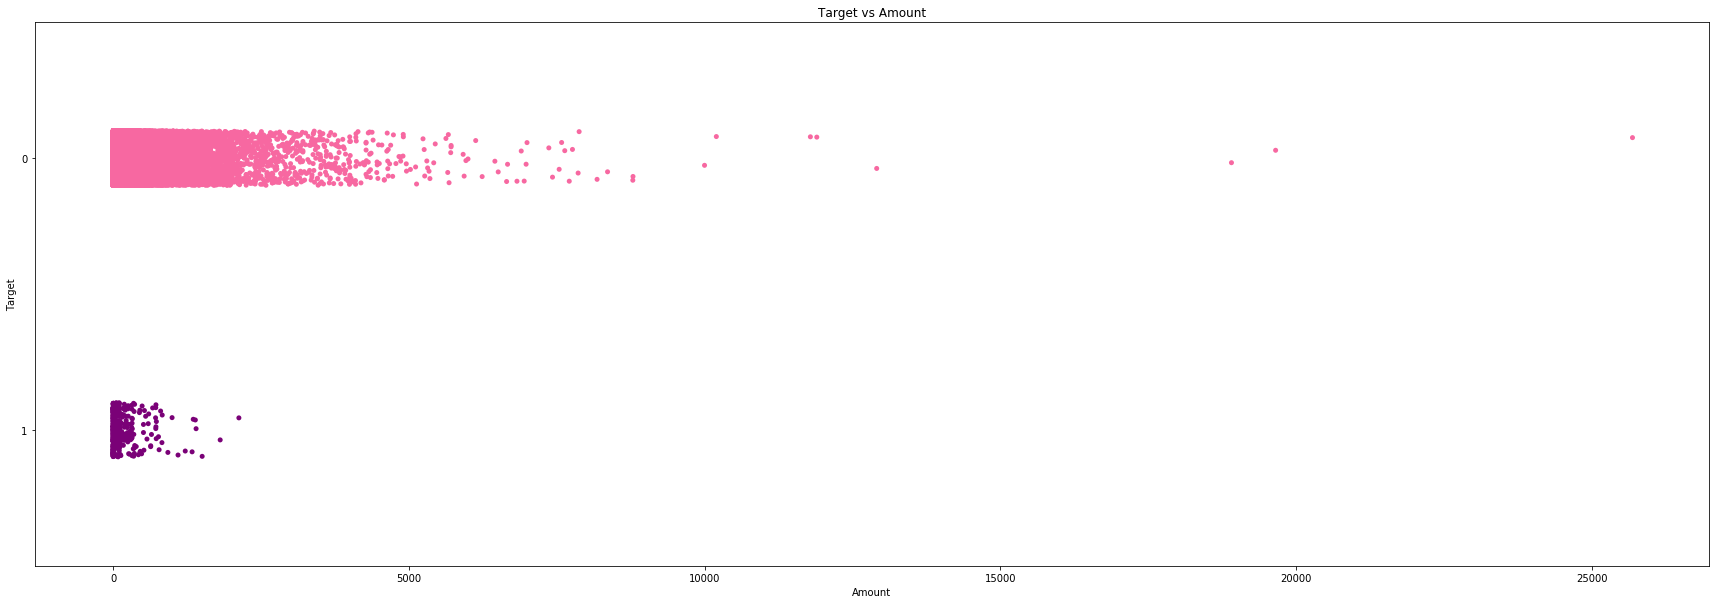

In [10]:
# Plotting frequency of Fraud Amounts by Target Value 
sns.stripplot(x=ccdf["amount"], y=ccdf['target'].astype('category'),
             palette=['#f768a1','#7a0177']);
plt.title('Target vs Amount')
plt.xlabel('Amount')
plt.ylabel('Target');

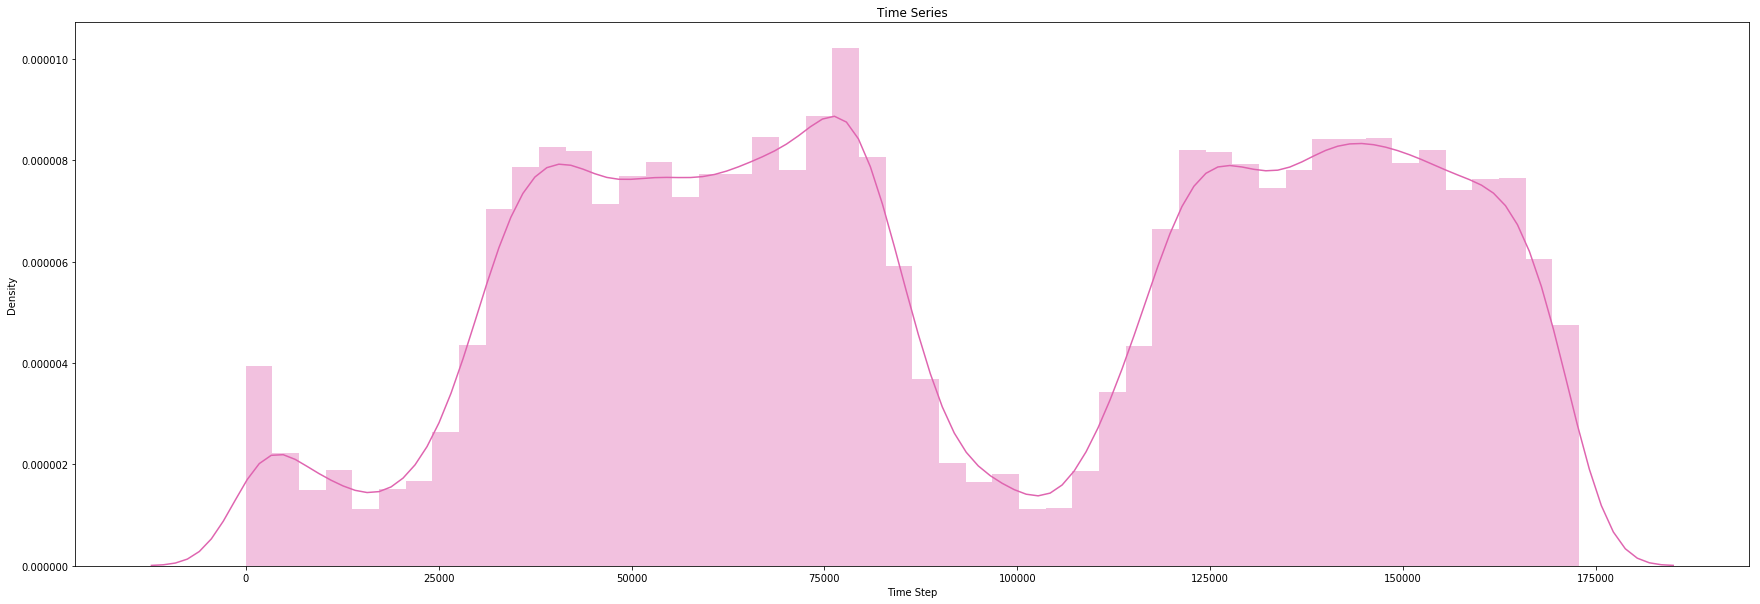

In [11]:
# Plot number of datapoints of each time interval
sns.distplot(ccdf.time, color='#df65b0');
plt.title('Time Series')
plt.xlabel('Time Step'); plt.ylabel('Density');

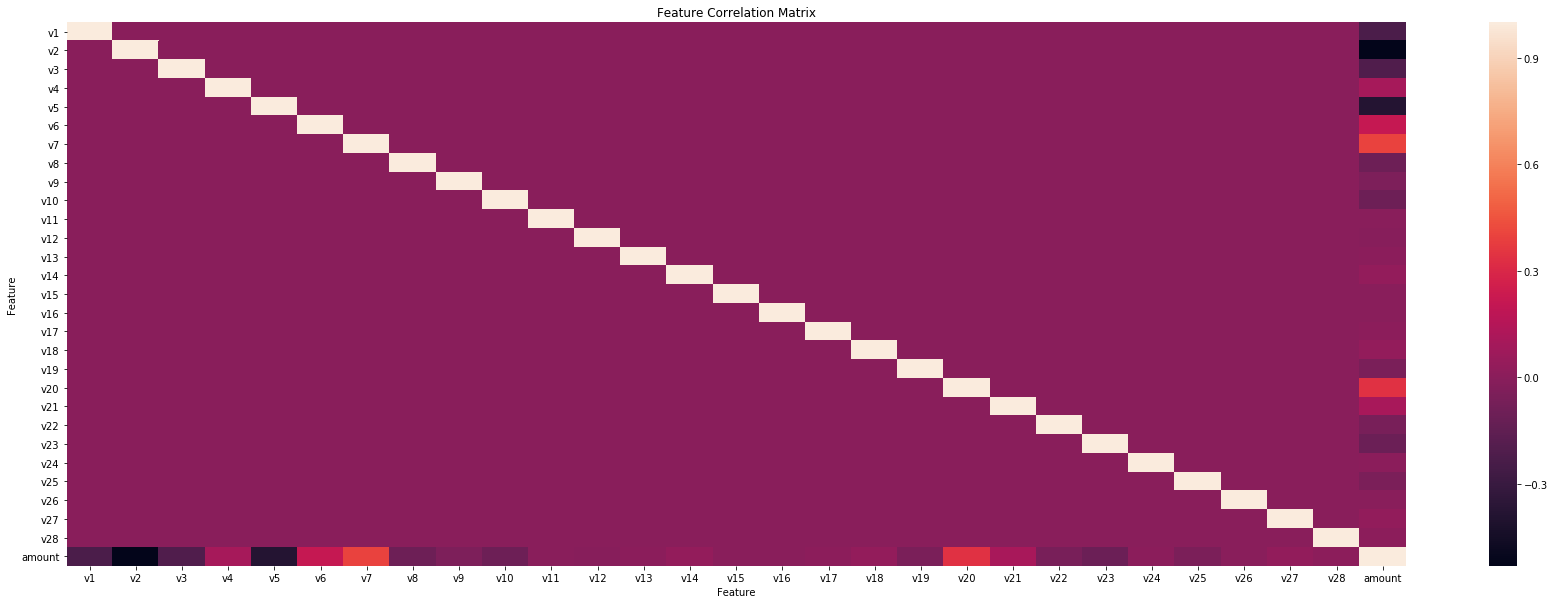

In [12]:
sns.heatmap(ccdf.loc[:,'v1':'amount'].corr());
plt.title('Feature Correlation Matrix')
plt.xlabel('Feature'); 
plt.ylabel('Feature');
plt.yticks(rotation=0);

Majority for this data has been provided by the bank after a PCA of transformation in an effort to economies the date. So we can see a lot of the features are not correlated since the PCA transformation has already been made.

In [13]:
# for col in sdf.select_dtypes(['int','float']):
#     plt.figure()
#     print('Feature:', col, '\t Results:', scipy.stats.shapiro(sdf[col]))
#     scipy.stats.probplot(sdf[col], dist="norm", plot = plt)
#     plt.title('Probability Plot: '+col)
#     plt.show()

<br><br>
<a id='synthetic'></a>
### Synthetic Credit Card Data

PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.

In [14]:
# View head ofthe synthetic credit card dataframe
num_columns = ['amount','oldbalanceorg','newbalanceorg','oldbalancedest','newbalancedest']
sdf.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorg,namedest,oldbalancedest,newbalancedest,target,isflaggedfraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


In [15]:
sdf.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorg,namedest,oldbalancedest,newbalancedest,target,isflaggedfraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


In [16]:
# View the summary statistics of the dataframe
sum_stat(sdf.select_dtypes(include=['int','float']))[num_columns].applymap('{:,.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max,nuniques,median,isnull
amount,"6,362,620.00","179,861.90","603,858.23",0.00,"13,389.57","74,871.94","208,721.48","92,445,516.64","5,316,900.00","74,871.94",0.00
oldbalanceorg,"6,362,620.00","833,883.10","2,888,242.67",0.00,0.00,"14,208.00","107,315.18","59,585,040.37","1,845,844.00","14,208.00",0.00
newbalanceorg,"6,362,620.00","855,113.67","2,924,048.50",0.00,0.00,0.00,"144,258.41","49,585,040.37","2,682,586.00",0.00,0.00
oldbalancedest,"6,362,620.00","1,100,701.67","3,399,180.11",0.00,0.00,"132,705.66","943,036.71","356,015,889.35","3,614,697.00","132,705.66",0.00
newbalancedest,"6,362,620.00","1,224,996.40","3,674,128.94",0.00,0.00,"214,661.44","1,111,909.25","356,179,278.92","3,555,499.00","214,661.44",0.00


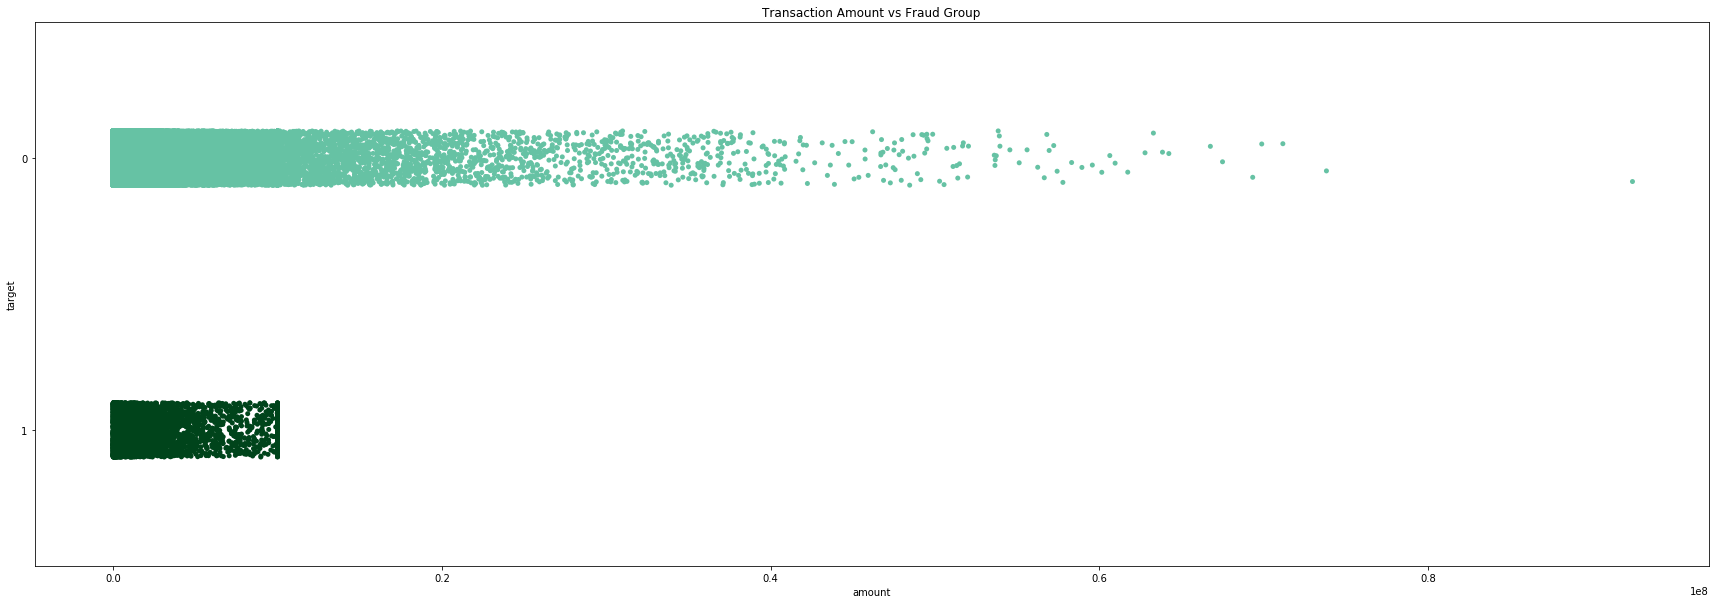

In [17]:
# Plotting frequency of Fraud Amounts by Target Value 
sns.stripplot(x=sdf["amount"], y=sdf['target'].astype('category'),
             palette=['#66c2a4','#00441b']);
plt.title('Transaction Amount vs Fraud Group');

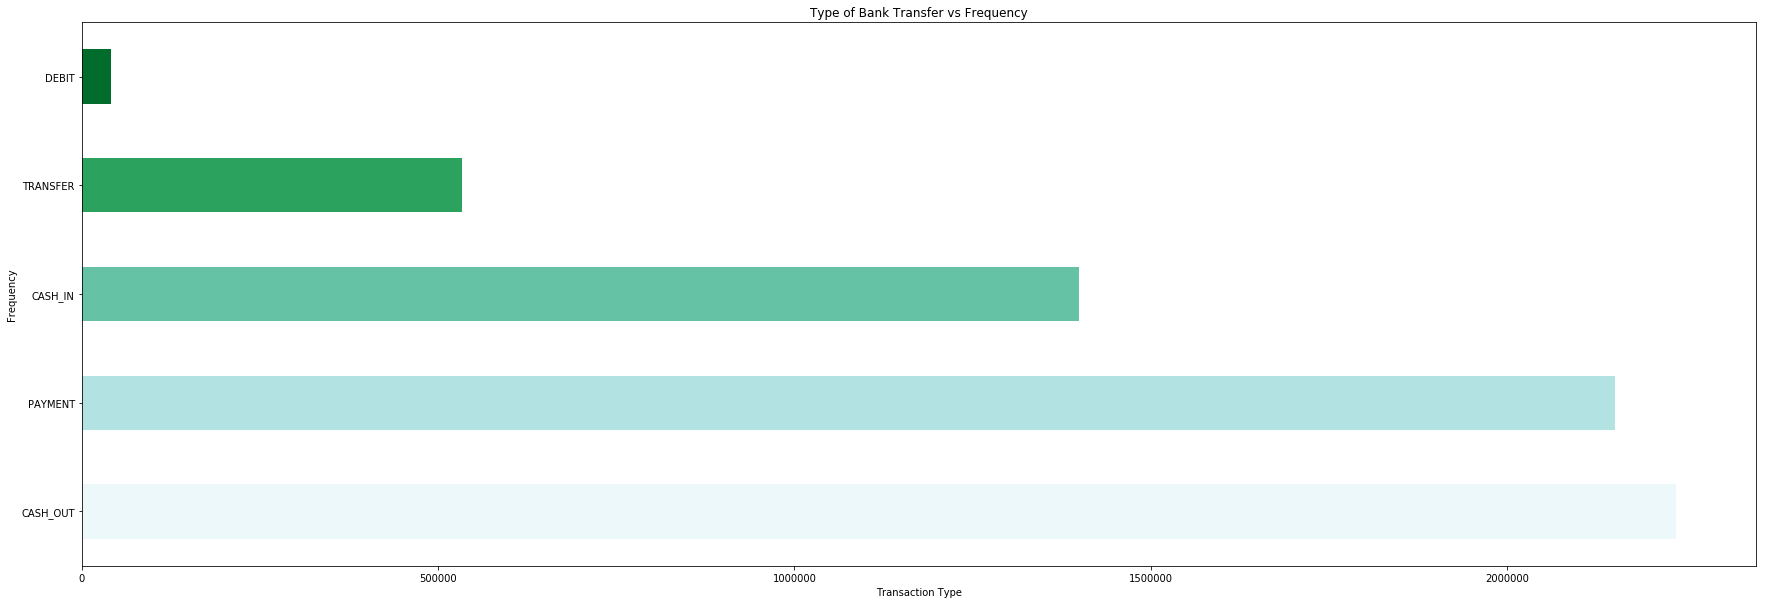

In [18]:
# View barplot of the data
sdf.type.value_counts().plot.barh(color=['#edf8fb','#b2e2e2','#66c2a4','#2ca25f','#006d2c']);
plt.title('Type of Bank Transfer vs Frequency');
plt.xlabel('Transaction Type')
plt.ylabel('Frequency');

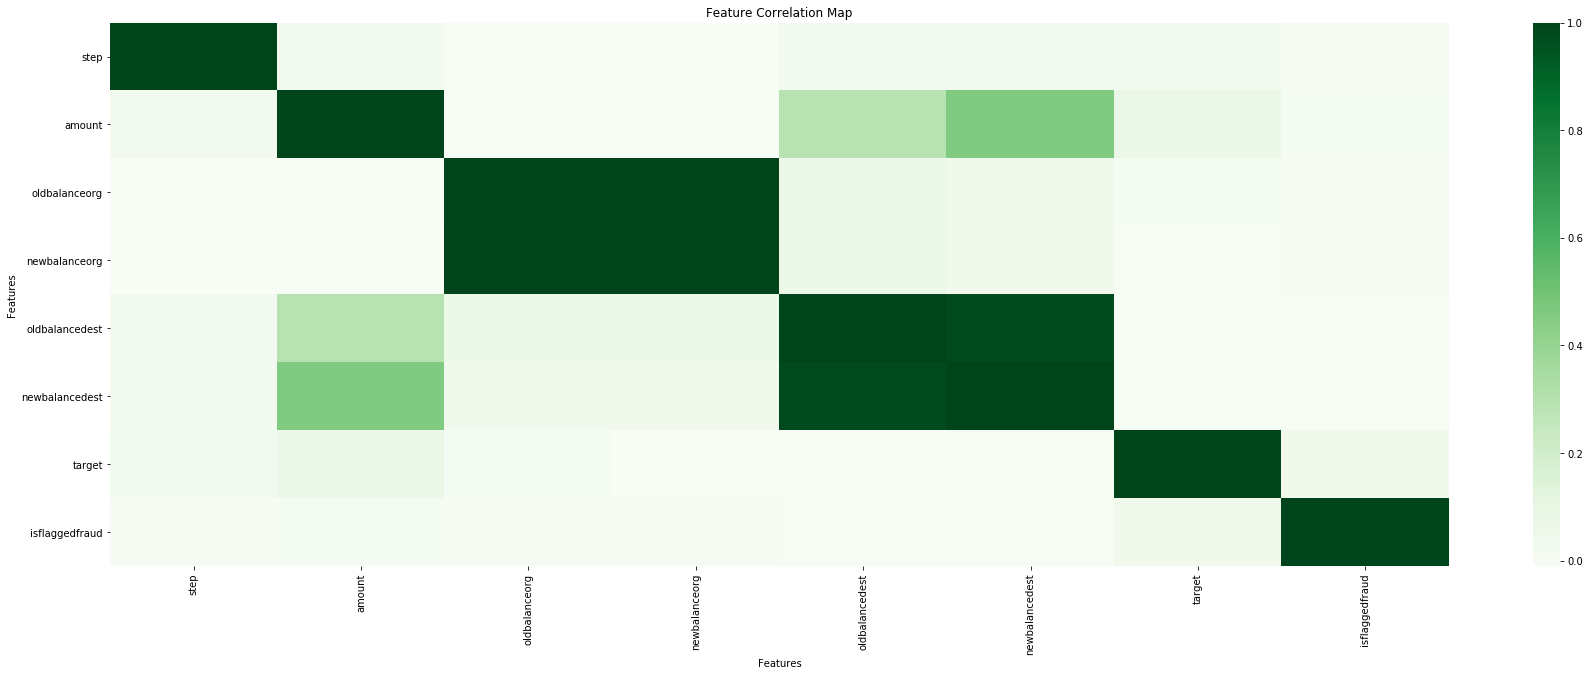

In [19]:
sns.heatmap(sdf.select_dtypes(['int','float']).corr(), cmap=plt.cm.Greens);
plt.title('Feature Correlation Map');
plt.ylabel('Features')
plt.xlabel('Features')
plt.xticks(rotation='vertical');

We see that the new and old balance data feature are highly correlated with each other which is interesting so let's take a look a bitter closer. We can see from the summary statics provided above that the means are very close. To see how this correlation can relate to fraud we will segment the plot by target class at the same.

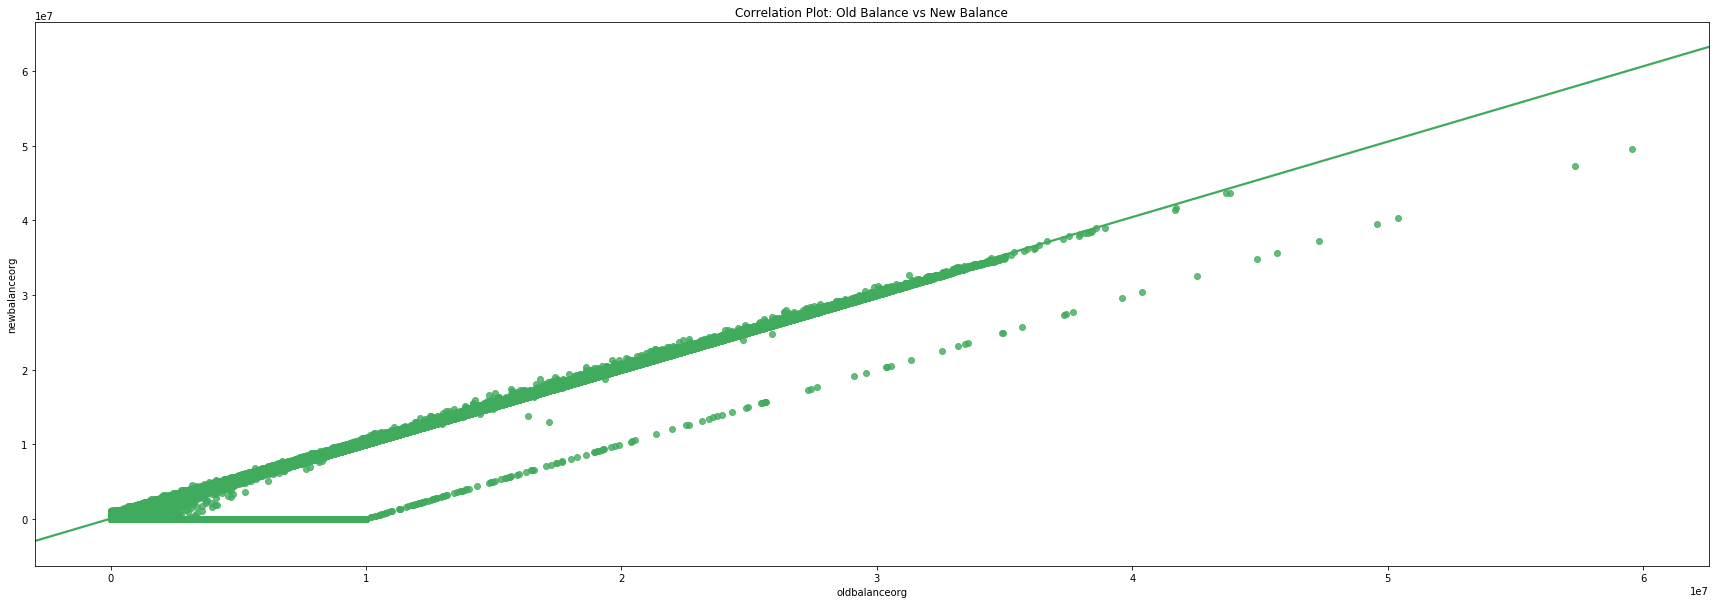

In [20]:
sns.regplot(x="oldbalanceorg", y="newbalanceorg", data=sdf, color='#41ab5d')
plt.title('Correlation Plot: Old Balance vs New Balance');

There to be a too different trend in the data. Since the transaction amount is slow the before and after balances remain relatively the same, so the value stary around the similar range. This makes why the feature would be highly correlated with each other.

In [21]:
# Set Figure Size
rcParams['figure.figsize'] = (30.0, 10.0)

<Figure size 2160x720 with 0 Axes>

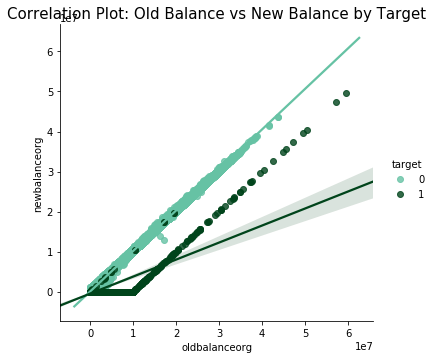

In [22]:
plt.figure()
sns.lmplot(x="oldbalanceorg", y="newbalanceorg",  hue='target',data=sdf, 
           palette=['#66c2a4','#00441b'])
plt.title('Correlation Plot: Old Balance vs New Balance by Target', fontsize=15);
plt.xlabel('oldbalanceorg', fontsize=10)
plt.ylabel('newbalanceorg',fontsize=10);

It looks like the two trend in the data shows a difference between our target classes. Therefore this may not be a case a duplicate feature as the heat map suggest. The closely correlated feature may affect our KNN model as it may count the same value twice. So we will try building a KNN with and without the `oldbalanceorg` feature to view the difference.

Note: There is currently a bug in the lm.plot function that will not allow me to change the figure size or fontsize of this plot in uniform with the plot above.

## <center>Preprocessing</center>
<a id='preprocessing'></a>

Moving forward in the analysis I have subsampled the remaining data to only 100,000 records. I subsampled the data so I am able to run the modeling analysis and training on my laptop in a reasonable amount of time. 

When we encode our data we change all the object feature in both dataframe into a numeric representation of the data. For the KDD dataset, we encoded all non-anomalies to 0 and all anomalies to 1 to value in line with the encoding of our other datasets. With the Synthetic credit card dataset, we encoding our name_orig, name_dest, and type. We later one-hot-encode the type feature and append the new feature onto out dataset.


Afterwards, we subsample our data to 100,000.  

<br><br>
<a id='encoding'></a>
### Encoding Data

We are taking the following steps with encoding our data. We are encoding all the target value to 0 and 1, 0 being non-fraud/network attacks and 1 for fraud/network attack on all our datasets. That way when we interpret our confusion matrixes we are using consistent values. We are also encoding all the objects columns for all the feature in all our datasets. We drop the flagged is fraud feature from the Synthetics Credit Card Dataset as it is a source off of a data leak, and we also drop the Time feature for the from the Kaggle Credit Card Dataset. Since the Synthetic Dataset is the only dataset with a categorical feature for transaction type we will also dummy that feature out.

##### Preprocessing: Synthetic Kaggle Credit Card Data

In [23]:
# Encode all object colunms to categorical codes
sdf.type = sdf.type.astype('category').cat.codes
sdf.nameorig = sdf.nameorig.astype('category').cat.codes
sdf.namedest = sdf.namedest.astype('category').cat.codes

# Drop is flagged false column
sdf = sdf.drop('isflaggedfraud', axis=1)

# Concatenate one-hot encoded type features
sdf = pd.concat([sdf,pd.get_dummies(sdf.type, 'type')], axis=1).drop('type',axis=1)

##### Preprocessing: Credit Card Data

In [24]:
# Drop Time Feature
ccdf = ccdf.drop('time',axis=1)
ccdf.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,target
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


<br><br>
<a id='splitting'></a>
### Subsampling and Split Data

In [25]:
# Define working directory
wdf = sdf
working_file_name = 'synthetics'.lower() #synthetics, kdd, credit_card
sub_sample_size = 100000
print(f'Dataset: {working_file_name}')

# define the classes for the confusion matrix
classes = list(np.unique(wdf['target'].values))

# Encode value to numpy
X = wdf.drop('target',axis=1).values
y = wdf['target'].values

# Sub sample the dataframe
if len(X) > sub_sample_size:
    X, y = sub_sampling(X,y, sub_sample_size)

# Conduct a train-test-split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25)

# Compute the sample weights of the dataset
weights = compute_sample_weight(class_weight='balanced', y=train_y)

# Compuete the number of PCA comentents we are goint to use
components = round(train_x.shape[1]/1.5)

# Saving a backup copy the original data
train_x_norm, train_y_norm = train_x.copy(), train_y.copy()
test_x_norm, test_y_norm = test_x.copy(), test_y.copy()

# Print preprocessing title
print('='*10,'Preprocessing','='*10,'\n')

if working_file_name != 'credit_card':
# Transform the data using PCA
    pca = PCA(n_components=components)
    train_x = pca.fit_transform(train_x)
    test_x = pca.transform(test_x)
    print(f'PCA Components: {components}')
else:
    print('No PCA Used')

# Transform the data using a standard scaler
scaler = StandardScaler(copy=True)
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)
print(f'Standard Scaler: Yes')

# Print data shape title
print('\n'+'='*10,'Data Shape','='*10,'\n')

# Printing metrics around the shape of the datframe

print(f'\nDataFrame Shape of X: {len(X)}')
print(f'DataFrame Shape of y: {len(y)}')
print(f'DataFrame Shape of X: {len(train_x)}')
print(f'DataFrame Shape of y: {len(train_y)}')
print(f'DataFrame Shape of X: {len(test_x)}')
print(f'DataFrame Shape of y: {len(test_y)}')
print(f'Target Classes: {classes}')


# KNN Deviations
if working_file_name =='synthetics':
    
    print('\n'+'='*10,'KNN Data Shape','='*10,'\n')
    
    X_reduce = wdf.drop(['target','oldbalanceorg'],axis=1).values
    y_reduce = wdf['target'].values

    # Sub sample the dataframe
    if len(X_reduce) > sub_sample_size:
        X_reduce, y_reduce = sub_sampling(X_reduce,y_reduce, sub_sample_size)

    # Conduct a train-test-split on the data
    train_x_reduce, test_x_reduce, train_y_reduce, test_y_reduce = train_test_split(
        X_reduce,y_reduce, test_size=0.25)
    print(f'\nDataFrame Shape of X: {len(X_reduce)}')
    print(f'DataFrame Shape of y: {len(y_reduce)}')
    print(f'DataFrame Shape of X: {len(train_x_reduce)}')
    print(f'DataFrame Shape of y: {len(train_y_reduce)}')
    print(f'DataFrame Shape of X: {len(test_x_reduce)}')
    print(f'DataFrame Shape of y: {len(test_y_reduce)}')
    print(f'Target Classes: {classes}')

Dataset: synthetics
========== Preprocessing ========== 

PCA Components: 9
Standard Scaler: Yes

========== Data Shape ========== 


DataFrame Shape of X: 100000
DataFrame Shape of y: 100000
DataFrame Shape of X: 75000
DataFrame Shape of y: 75000
DataFrame Shape of X: 25000
DataFrame Shape of y: 25000
Target Classes: [0, 1]

========== KNN Data Shape ========== 


DataFrame Shape of X: 100000
DataFrame Shape of y: 100000
DataFrame Shape of X: 75000
DataFrame Shape of y: 75000
DataFrame Shape of X: 25000
DataFrame Shape of y: 25000
Target Classes: [0, 1]


In [26]:
joblib.dump(pca, 'Model/pca.sav')
joblib.dump(scaler,'Model/scaler.sav');

cWe will be taking our processed data and apply it to a different supervise, unsupervised, and anomaly detection models. We will also be splitting each of the dataset see anomaly detection with different feature and class imbalance levels. I have run every model on all every data set. If you would want to compare results across the datasets. Please take a look at the metrics.csv file under the Scores subfolder within this directory.

<br><br><br><br>
## <center>Supervised Learners</center>
<a id='dummymodel'></a>
First, we are going to try some supervised approaches on our data. As we conduct our cross-validation for each model moving forwards we will want to store our cross-validation scores for each model so we can access our model afterward. I have created a few lists below that we will appending our scores too. 


- AUC ROC
- F1-Score
- Precision
- Recall

The recall is the number of correct results divided by the number of all the results. It tells us How many relevant items were select, calculated by the TP divided by the total number of relevant object in the area, which would be the TP + FN. Precision, on the other hand, tells us how many selected items are relevant, calculated by the taking the TP and dividing it by the total number of records we classified as positives, this would be our TP + FP. Maximizing precision or recall is relatively simple so we are also measuring the hyperbolic mean between these scores which is the F1 scores. Finally, our main metrics will be the Area under the ROC and AUC curve. The ROC is a plot to measure the difference between the TP rate and the FP rate. A ROC curve with more area under the cure is what we are actively looking for.

<br><br>
### Dummy Model
<a id='dummy'></a>

To have a solid base of understanding of the data, and our proposed evaluation metrics. I have created a dummy model below that predicts that every points test and train set is an anomaly. Take a look a the prediction outcomes and corresponding score for our dummy classifier

Done
Cross Validation ROC: 0.5
Cross Validation F1: 0.002849268154766515
Cross Validation Precision: 0.0014266666010113093
Cross Validation Recall: 1.0


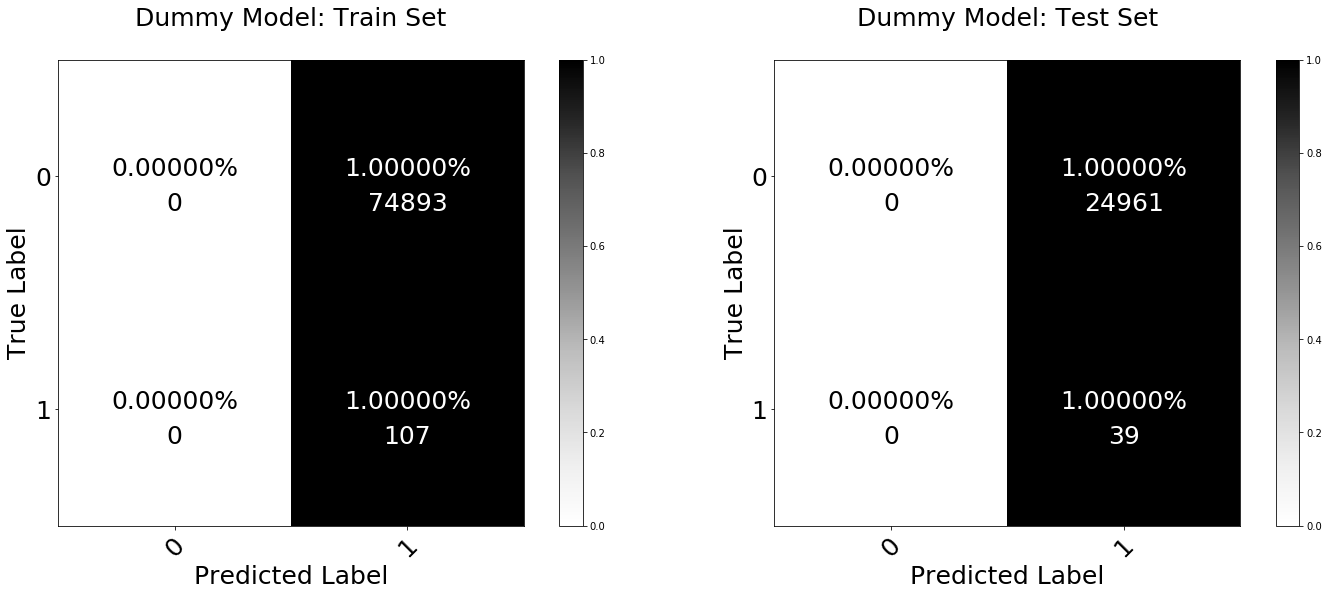

In [27]:
# Import and fit dummy model
dm_model = DummyClassifier(strategy='constant', constant=1)
dm_model.name = 'dummy_model'
dm_model.fit(train_x, train_y, sample_weight = weights)

# Store CV Scores
cross_validate_normal(dm_model, verbose=0, train_y=train_y, train_x= train_x)

# Plot Model
plot_confusion_normal(dm_model, train_x=train_x, train_y=train_y,
                     test_x=test_x ,test_y=test_y, cmap=plt.cm.Greys)

# Save Model
joblib.dump(dm_model, 'Model/'+dm_model.name+'_'+working_file_name+'.sav');

With a dummy classifier that predicts that every one of models is an Anomaly, our ROC MOC score is 0.5 with an F1 score of 0.8886, Precision Score of 0.79995866, and a Recall Score of 100%. This falls in line with our intuition. As the number anomalies in our dataset are so few the default prediction remain generally. 

<br><br>
<a id='logisticmodel'></a>
### Logistic Regression Model

Let start off of modeling and start off with a simple Logistic Regression Model on our Data. using this model can be interpretable. And we can easily understand the importance of each feature to out data. We will use this is a base model as we move forward.

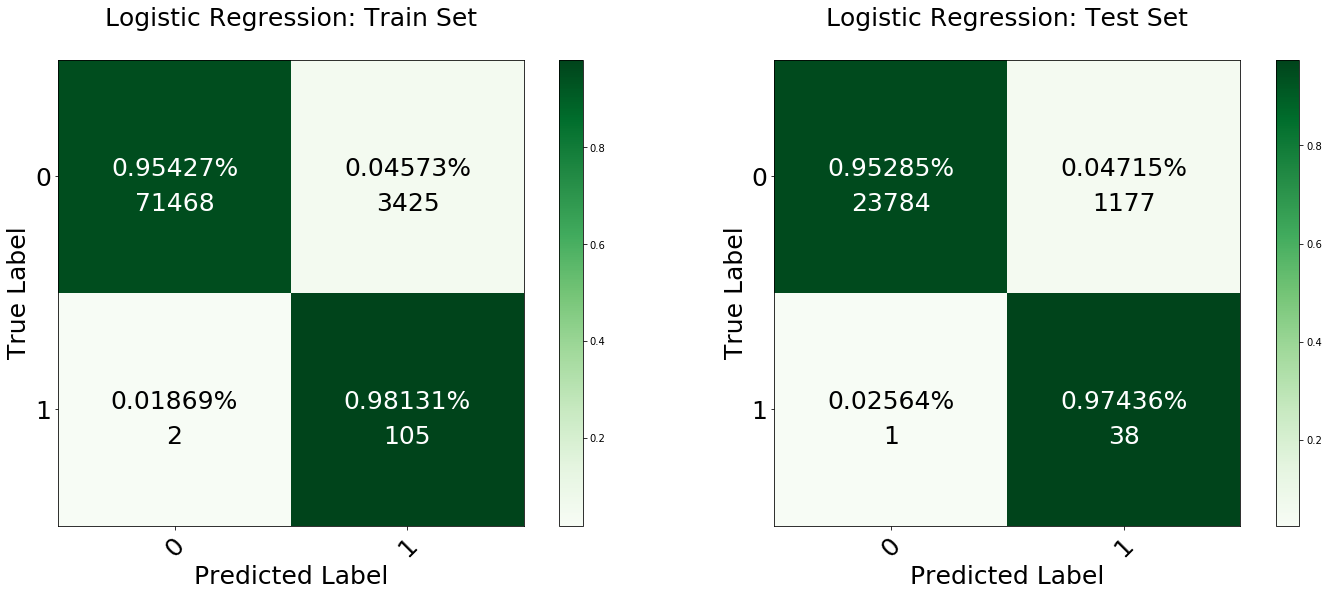

In [28]:
# Import fit logistic regression model
lr_model = LogisticRegression( random_state=7)
lr_model.name = "logistic_regression"
lr_model.fit(train_x, train_y, sample_weight = weights)

# Store CV Scores
# cross_validate_normal(lr_model, cv = 5, fit_params = {'sample_weight': weights}, 
#                  verbose=0, train_y=train_y, train_x= train_x)

# Plot Model
plot_confusion_normal(lr_model, train_x=train_x, train_y=train_y,
                     test_x=test_x ,test_y=test_y)

# Save Model
joblib.dump(lr_model, 'Model/'+lr_model.name+'_'+working_file_name+'.sav');

Our Logistic model is great if we are looking at just the FN rate. Only 11 False Negatives. that is great, but look how many FP we have 7000+!!! Damn, that is a lot.

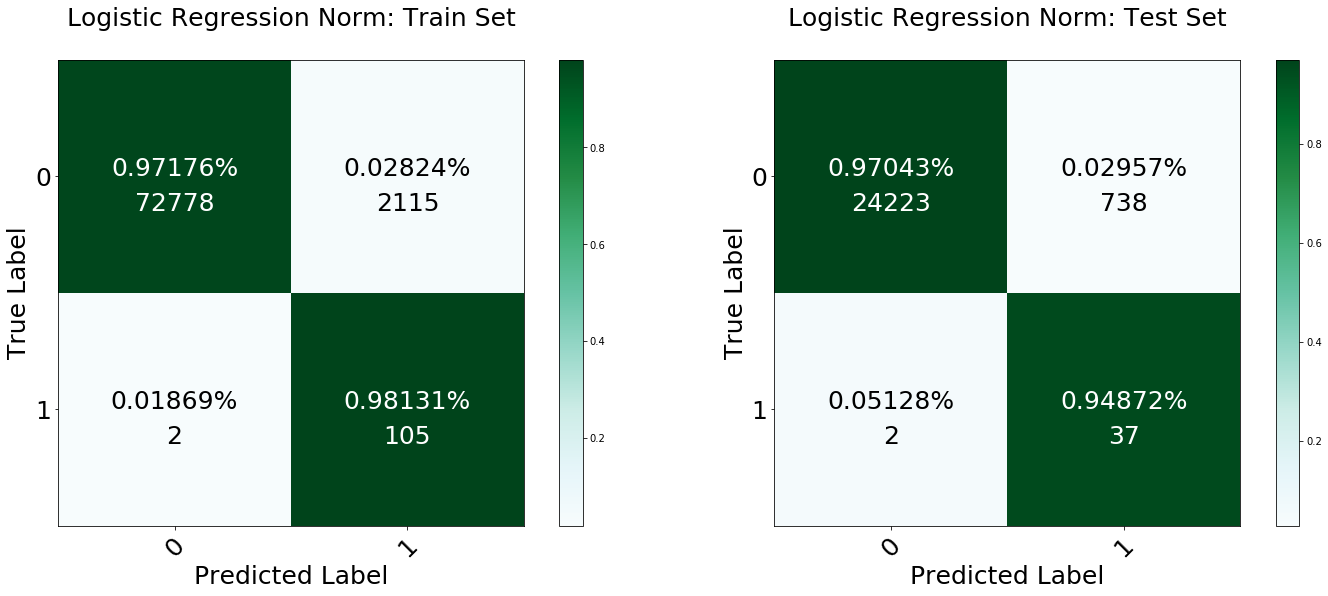

In [29]:
# Import and fit decision tree clasisifier
lr_model_norm = LogisticRegression( random_state=7)
lr_model_norm.name = "logistic_regression_norm"
lr_model_norm.fit(train_x_norm, train_y_norm, sample_weight = weights)

# # Run crossvalidation using the model
# cross_validate_normal(lr_model_norm, fit_params={'sample_weight':weights}, verbose=0,
#                      train_y=train_y, train_x= train_x)

# Plot confusion matrix
plot_confusion_normal(lr_model_norm, train_x=train_x_norm, train_y=train_y_norm,
                     test_x = test_x_norm, test_y = test_y_norm, cmap=plt.cm.BuGn)

# Save model
joblib.dump(lr_model_norm, 'Model/'+lr_model_norm.name+'_'+working_file_name+'.sav');

This tell us that our data does not live on a linear manifold as our PCA preprocessing step is throwing away a lot of data.

In [30]:
# # Create and view coefficients for our second plot
# feature = pd.DataFrame(wdf.drop(['target'],axis=1).columns, columns=['Feature'])
# coef = pd.DataFrame(lr_model_norm.coef_.reshape(-1,1), columns=['Coeff'])
# coef_matrix = pd.concat([feature,coef], axis=1)
# coef_matrix.set_index('Feature', drop =True).T

In [31]:
# wdf.columnsa

In [32]:
# lr_model_norm.coef_

<br><br>
<a id='svm'></a>
### Support Vector Machines

As seen above our logisic regression does pretty well. But the model above is optimizing for accuracy. Let try using a support vector machine and tune our model against using a few diffrent solvers.



 ========== rbf ========== 

[LibSVM]Done
Cross Validation ROC: 0.980282927756915
Cross Validation F1: 0.6147520305753786
Cross Validation Precision: 1.0
Cross Validation Recall: 0.44393980848153214


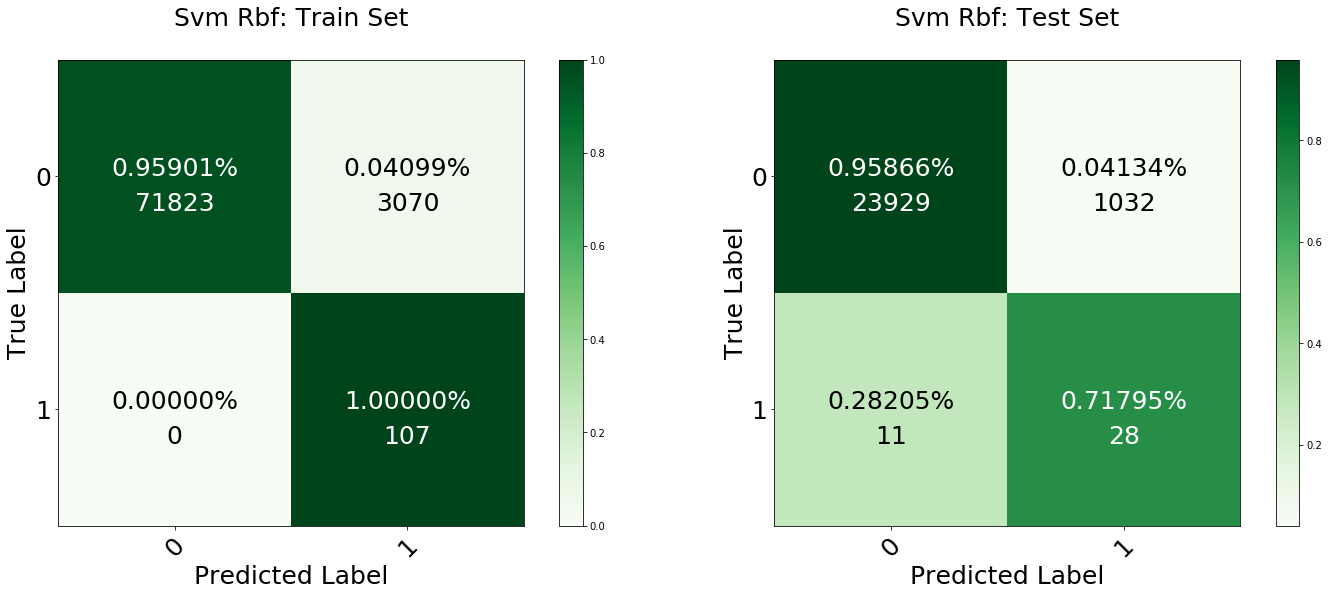



 ========== poly ========== 

[LibSVM]Done
Cross Validation ROC: 0.9009869420491533
Cross Validation F1: 0.6537974372955289
Cross Validation Precision: 1.0
Cross Validation Recall: 0.48593707250342


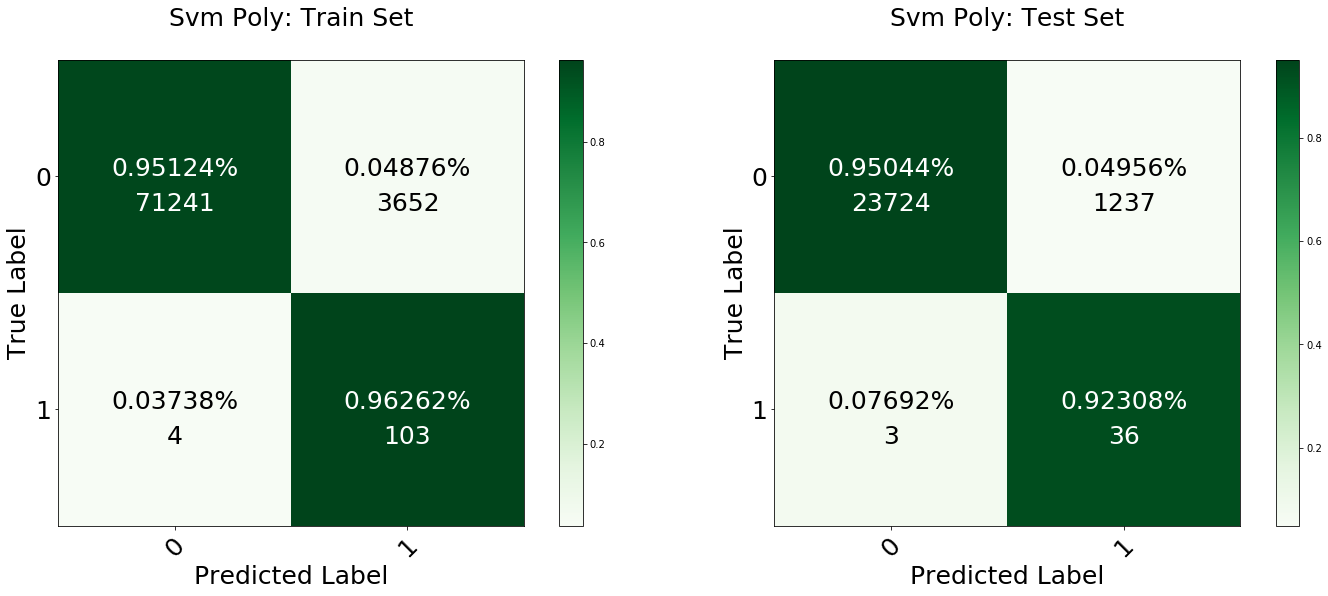



 ========== linear ========== 

[LibSVM]Done
Cross Validation ROC: 0.9722992599112106
Cross Validation F1: 0.5706149937455276
Cross Validation Precision: 1.0
Cross Validation Recall: 0.3996169630642955


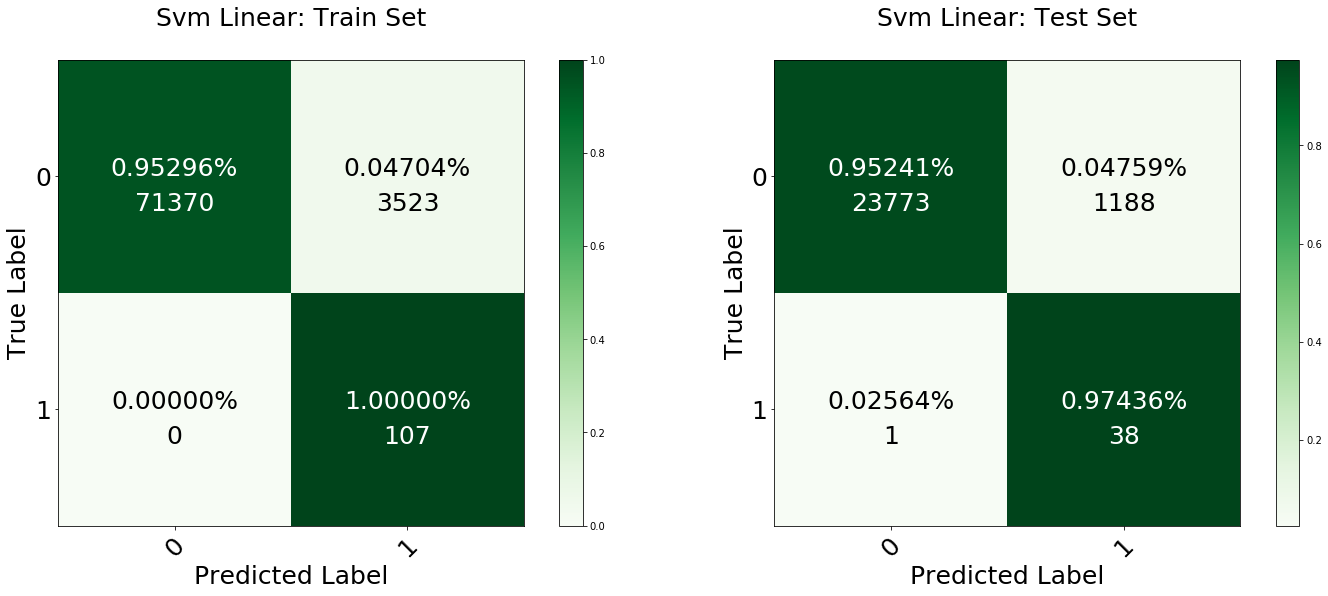



 ========== sigmoid ========== 

[LibSVM]Done
Cross Validation ROC: 0.7637449835341518
Cross Validation F1: 0.40892969472647955
Cross Validation Precision: 0.478177411847786
Cross Validation Recall: 0.35786593707250336


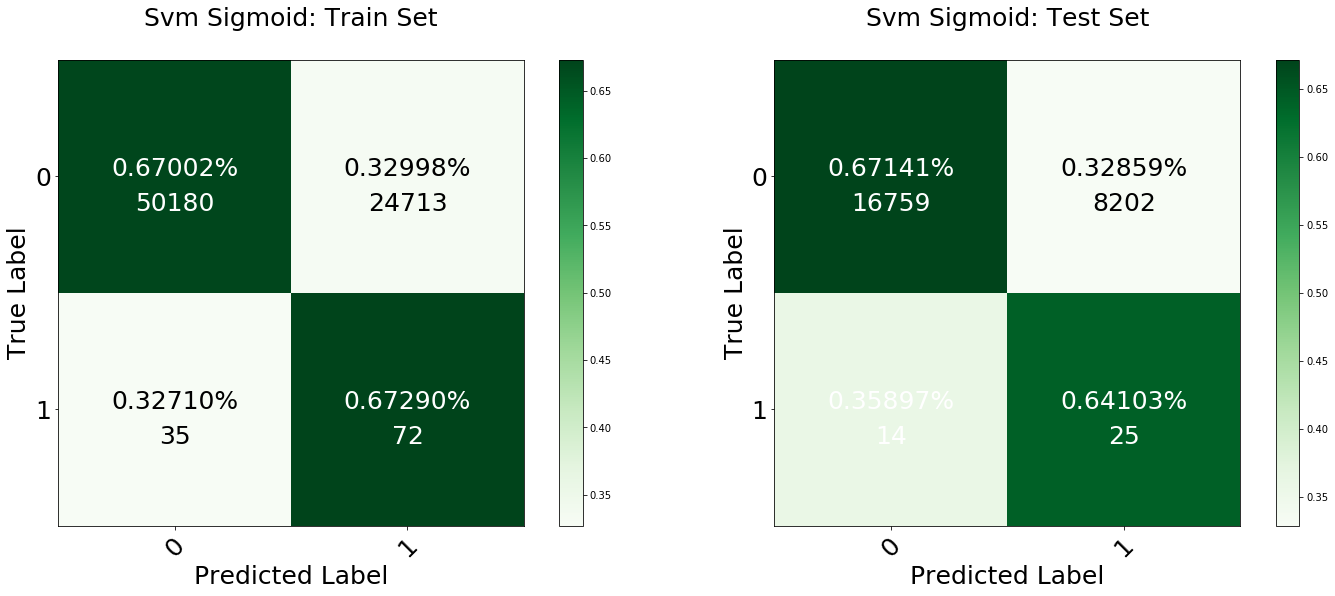

In [33]:
# Generate a list of Support Vector Machine Sovlers
solvers = ['rbf','poly','linear','sigmoid']

# Fit and Score a model for each solver
for kernel in solvers:
    print('\n\n','='*10,kernel,'='*10,'\n')
    svm_model = SVC(kernel=kernel, verbose=1)
    svm_model.name = 'svm_'+kernel
    svm_model.fit(train_x,train_y, sample_weight = weights);
    
    # Run crossvalidation using the model
    cross_validate_normal(svm_model, cv=5, verbose=0,
                         train_y=train_y, train_x= train_x)
    
    # Plot confusion Matrix
    plot_confusion_normal(svm_model,train_x=train_x, train_y=train_y,
                     test_x=test_x ,test_y=test_y)
    
    # Sho plot
    plt.show()
    
    # Dump Models
    joblib.dump(svm_model, 'Model/svm_model_'+kernel+'_'+working_file_name+'.sav')

We had a better results with our RBF solver. Lets run a grid search on that support vector machine and find the best regularization C value.

<a id='svm'></a>
##### Support Vector Machine - Grid Search

In [ ]:
svm_model = SVC(kernel='rbf', verbose=1)

# Setting up the grid
grid = {'C': np.append(0.1**np.arange(1,3), 10**np.arange(1,2))}

# Initialize with GridSearchCV with grid
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=grid, 
                     scoring='roc_auc', verbose=1, n_jobs=1, refit=True, cv=5,
                     return_train_score=True);

# Fit models
svm_grid_search.fit(X,y)

print('ROC_AUC of best parameters: %.3f'%svm_grid_search.best_score_)
print('Best parameters: %s' %svm_grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

<a id='knn'></a>
### K-Nearest Neighbours Classsifier

While computation expensive, I wanted to try a KNN model to see if the compuation cost would be worth the result as compared to a tree based or linear model. The nearest neighbour model for classifications fit similiar points to the same group using the nearest neighbours parameter. Data that is closely associated with each other is grouped to the same class using a distance measurement. 

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.1min remaining:   44.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


Done
Cross Validation ROC: 0.9994040413884718
Cross Validation F1: 0.5881832588328499
Cross Validation Precision: 0.9782725603003538
Cross Validation Recall: 0.42056486254295533


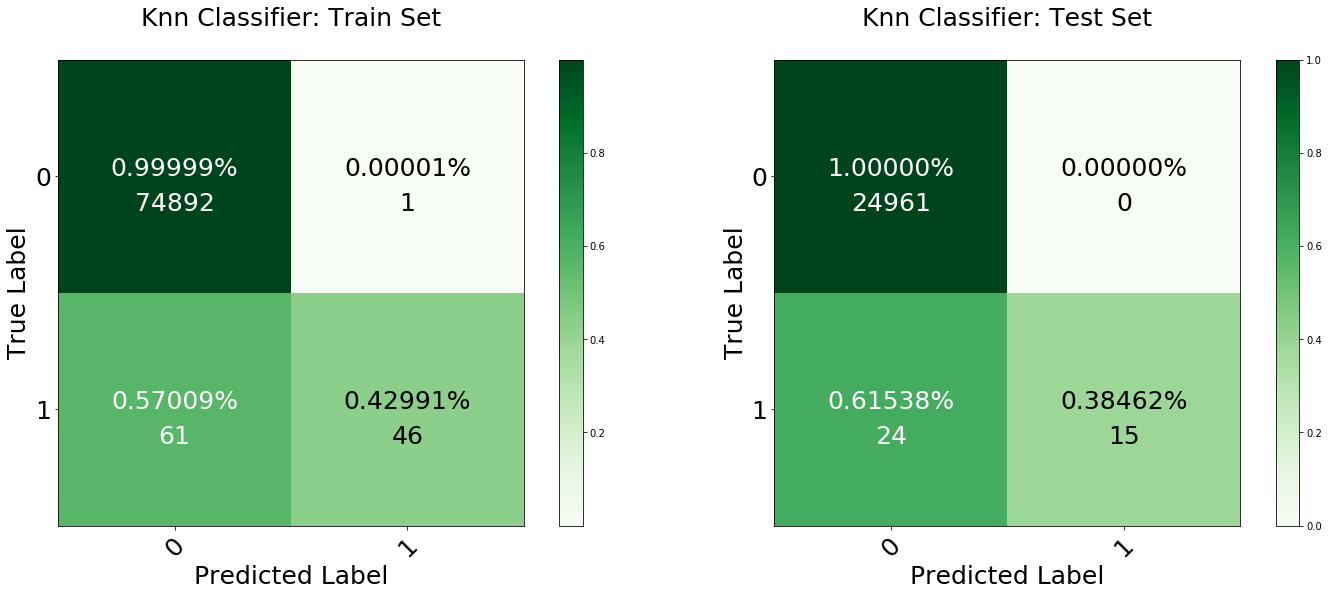

In [27]:
# Import knn classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.name = "knn_classifier"
knn_model.fit(train_x, train_y)

# Run crossvalidation using the model
cross_validate_normal(knn_model, train_y=train_y, train_x= train_x)

# Plot confusion matrix
plot_confusion_normal(knn_model,train_x=train_x, train_y=train_y,
                     test_x=test_x ,test_y=test_y)

# Save model
joblib.dump(knn_model, 'Model/'+knn_model.name+'_'+working_file_name+'.sav');


Done
Cross Validation ROC: 0.9988324815240753
Cross Validation F1: 0.299535336357188
Cross Validation Precision: 0.9001595789831084
Cross Validation Recall: 0.18011921458625527


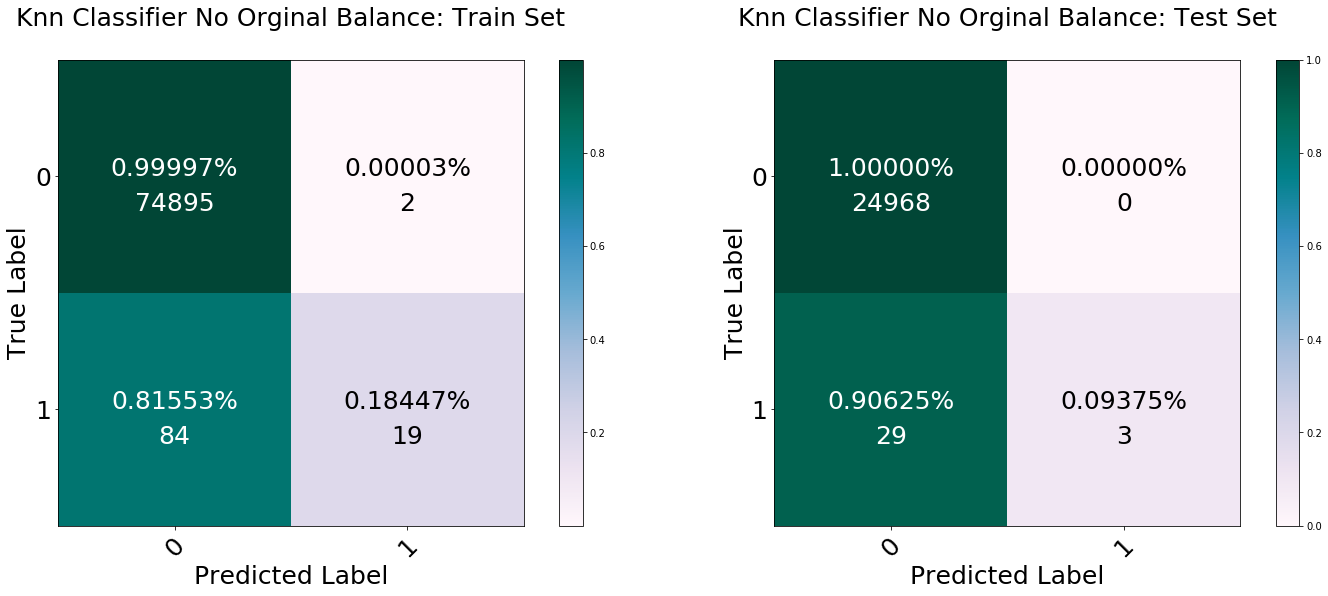

In [28]:
# A KNN model for only the synthetics data after dropping the second account 
# balance feature
if working_file_name =='synthetics':
    # Import knn classifier
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.name = "knn_classifier_no_orginal_balance"
    knn_model.fit(train_x_reduce, train_y_reduce)

    # Run crossvalidation using the model
    cross_validate_normal(knn_model, train_y=train_y_reduce, 
                          train_x= train_x_reduce, verbose=0)

    # Plot confusion matrix
    plot_confusion_normal(knn_model,train_x=train_x_reduce, train_y= train_y_reduce,
                          test_x=test_x_reduce ,test_y=test_y_reduce,cmap=plt.cm.PuBuGn)

    # Save model
    joblib.dump(knn_model, 'Model/'+knn_model.name+'_'+working_file_name+'.sav');

We did poorer in our precision and recall when removing that feature. That was interesing we will not this for our model.

# <a id='dtc'></a>
### Decision Tree Classifier
Decision Tree are popular models as they are easy to intrepret to the humman eye. This makes them more advantagous to use compare to the KNN model. The Decision tree will split the data based on this gini coefficent and make the apporiate split in the data that maximized the our roc auc score.

Done
Cross Validation ROC: 1.0
Cross Validation F1: 1.0
Cross Validation Precision: 1.0
Cross Validation Recall: 1.0


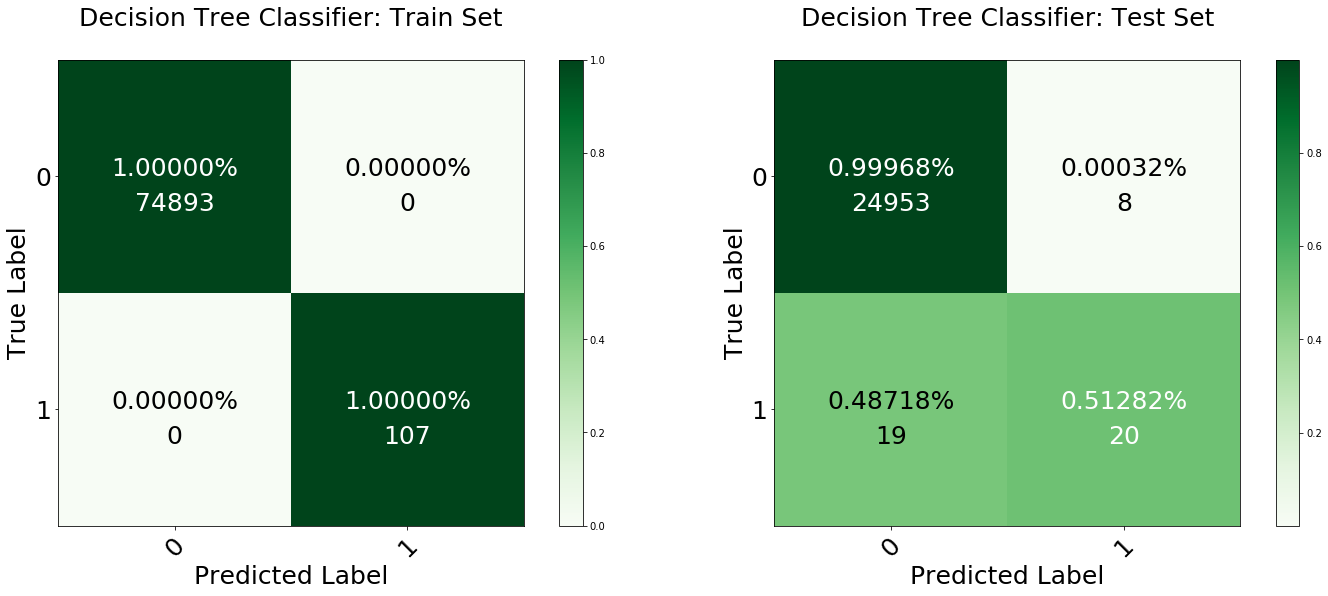

In [29]:
# Import and fit decision tree clasisifier
dt_model = DecisionTreeClassifier(random_state=7)
dt_model.name = "decision_tree_classifier"
dt_model.fit(train_x, train_y, sample_weight = weights)

# Run crossvalidation using the model
cross_validate_normal(dt_model, fit_params={'sample_weight':weights}, verbose=0,
                     train_y=train_y, train_x= train_x)

# Plot confusion matrix
plot_confusion_normal(dt_model,train_x=train_x, train_y=train_y,
                     test_x=test_x ,test_y=test_y)

# Save model
joblib.dump(dt_model, 'Model/'+dt_model.name+'_'+working_file_name+'.sav');

Some models to benefit as much from a PCA transformation. PCA will make the model value each feature equally. But when your are detecting fraud we may amount want to way one feature more heavily than other. Espically whe we do an decision tree as we would like want to split a decision try by a more import feature more often.

Therefore I have redone our preprocessing to an couple of new training and testing variable but I have removed all PCA transformation.

Done
Cross Validation ROC: 1.0
Cross Validation F1: 1.0
Cross Validation Precision: 1.0
Cross Validation Recall: 1.0


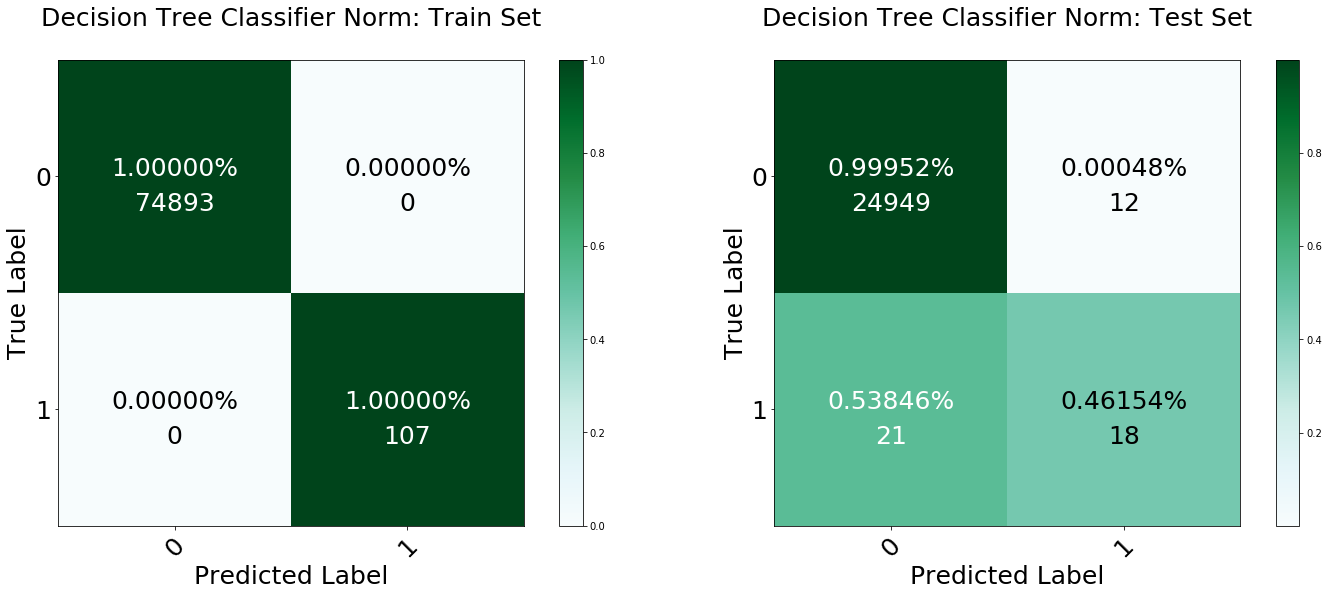

In [30]:
# Import and fit decision tree clasisifier
dt_model_norm = DecisionTreeClassifier(random_state=7)
dt_model_norm.name = "decision_tree_classifier_norm"
dt_model_norm.fit(train_x_norm, train_y_norm, sample_weight = weights)

# Run crossvalidation using the model
cross_validate_normal(dt_model_norm, fit_params={'sample_weight':weights}, verbose=0,
                     train_y=train_y, train_x= train_x)

# Plot confusion matrix
plot_confusion_normal(dt_model_norm, train_x=train_x_norm, train_y=train_y_norm,
                     test_x = test_x_norm, test_y = test_y_norm, 
                      cmap=plt.cm.BuGn)

# Save model
joblib.dump(dt_model_norm, 'Model/'+dt_model_norm.name+'_'+working_file_name+'.sav');

A confusion matrix is great. but with now that we are dealing with Tree based model ew can use the `graphiz` package to 
visualize the data. So lets retrain out model using data that has not gone through a PCA or scaling transformation to get a better understanding of the the data.

If your this model multiple times you actually get very diffent false positive rates.

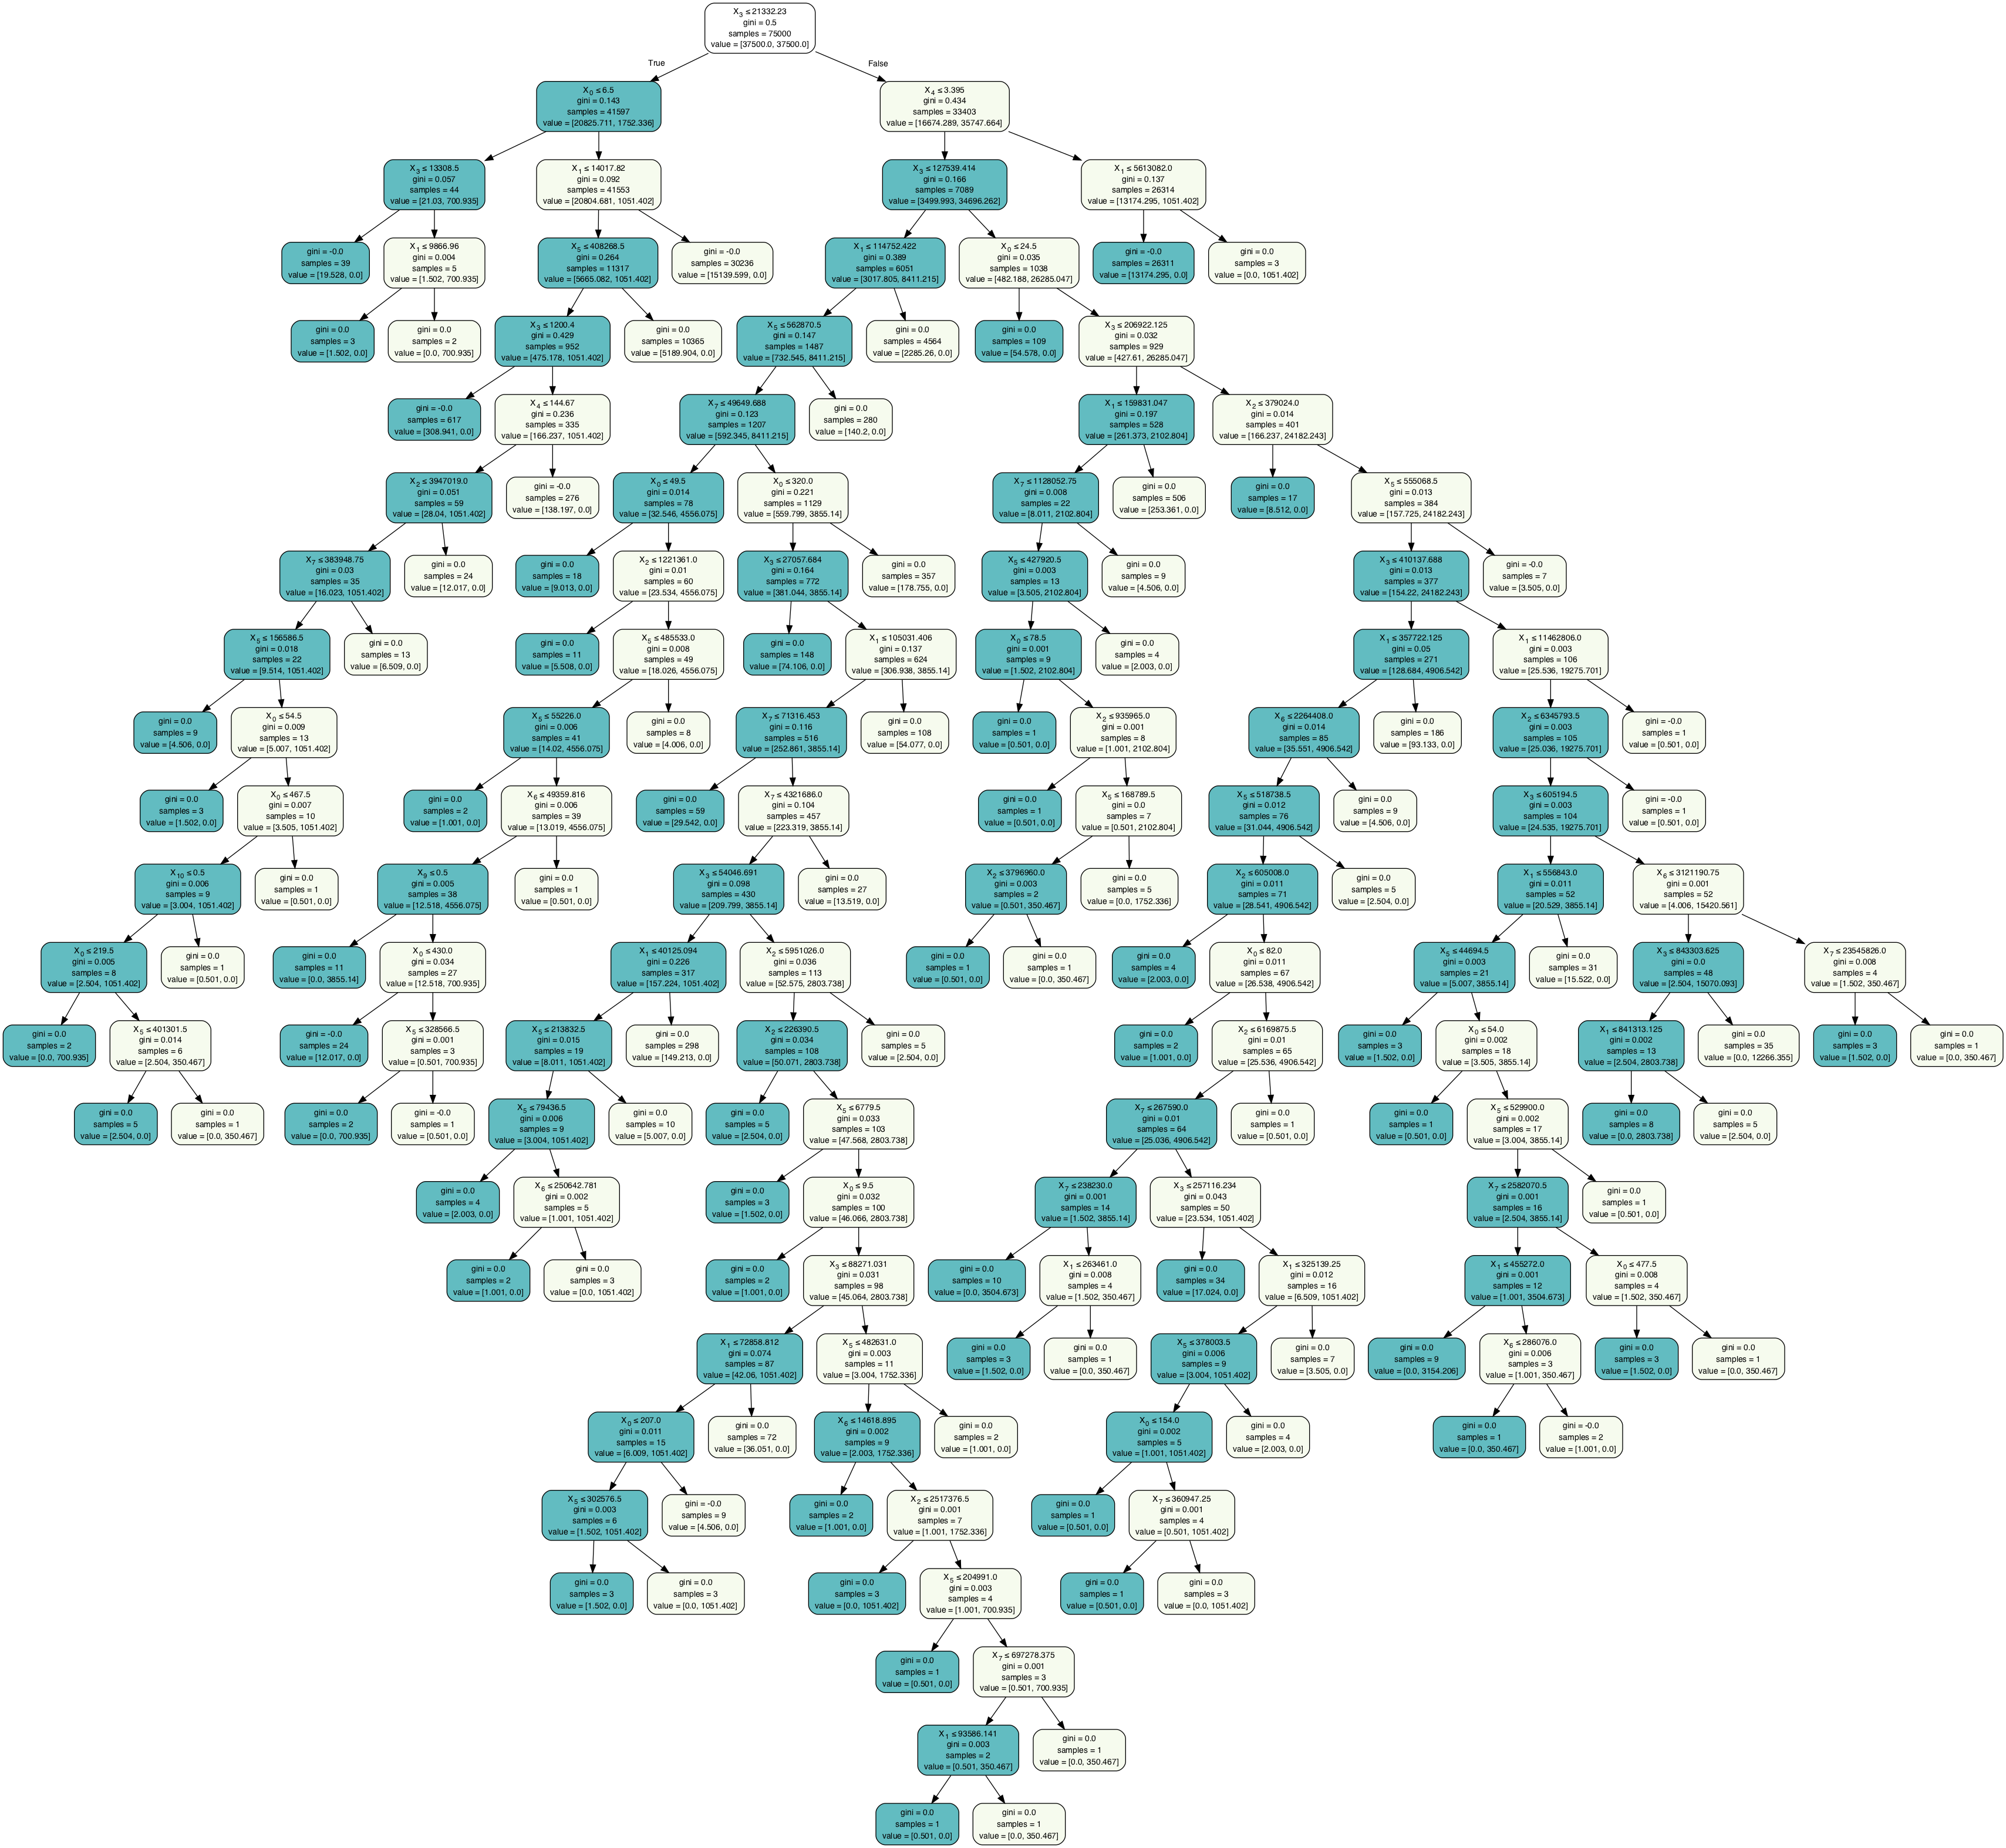

In [31]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections


dot_data = StringIO()

# Export graph from sklearn
export_graphviz(dt_model_norm, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

# Generate graphusing pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

colors = ('#62BCC1', '#F6FBEE')
edges = collections.defaultdict(list)

# Pl
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

# Save Image
graph.write_png('Model/Images/'+dt_model_norm.name+'_'+working_file_name+'_tree.png')

# View Decision Tree Plot
Image(graph.create_png())

## <a id='rfc'></a>
### Random Forest Classifier

The scores of decision tree can change dermaticaly the often we run the model. Therefore using random forest model with give us the benefits of the decision tree with the add stabaility of an ensemble to stabilize our results. You see that I did an model with and without PCA information again.

Done
Cross Validation ROC: 1.0
Cross Validation F1: 0.9994764397905758
Cross Validation Precision: 1.0
Cross Validation Recall: 0.9989583333333334


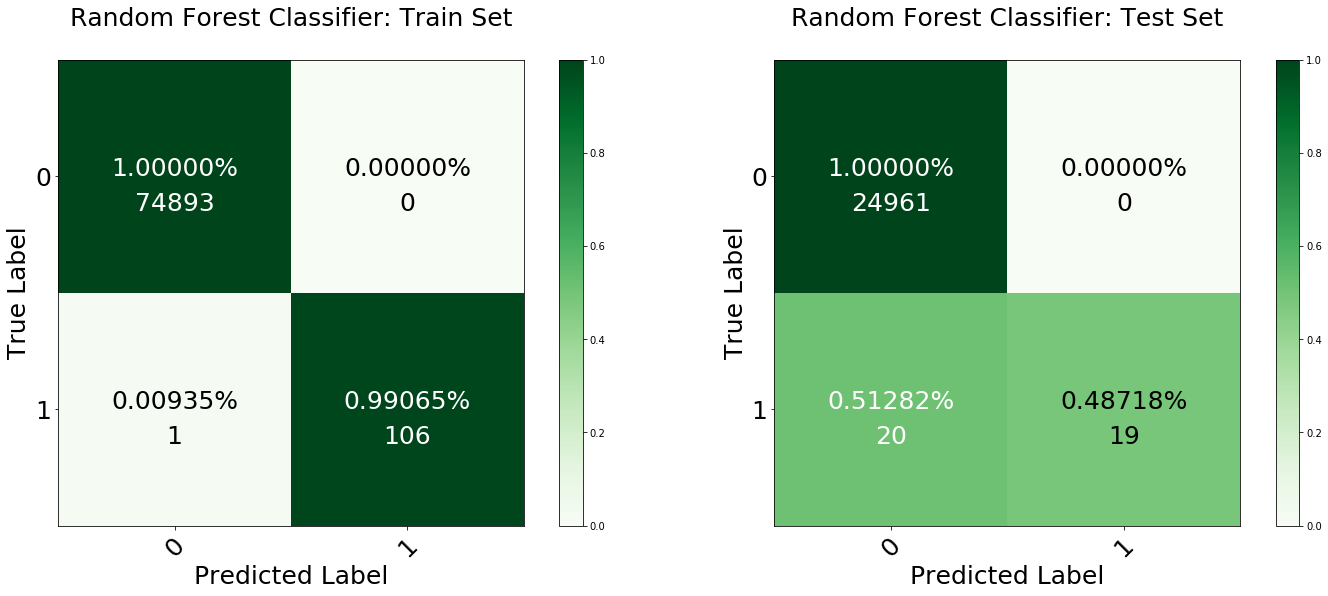

In [32]:
# Import and fit random forest classifeir
rf_model = RandomForestClassifier(n_estimators=100, random_state=7)
rf_model.name = "random_forest_classifier"
rf_model.fit(train_x, train_y, sample_weight = weights)

# Run the crossvaldatino using the model
cross_validate_normal(rf_model, fit_params={'sample_weight':weights}, verbose=0,
                     train_y=train_y, train_x= train_x)

# Plot confusion matrix
plot_confusion_normal(rf_model,train_x=train_x, train_y=train_y,
                     test_x=test_x ,test_y=test_y)

# Save model
joblib.dump(rf_model, 'Model/'+rf_model.name+'_'+working_file_name+'.sav');

Done
Cross Validation ROC: 1.0
Cross Validation F1: 0.9994764397905758
Cross Validation Precision: 1.0
Cross Validation Recall: 0.9989583333333334


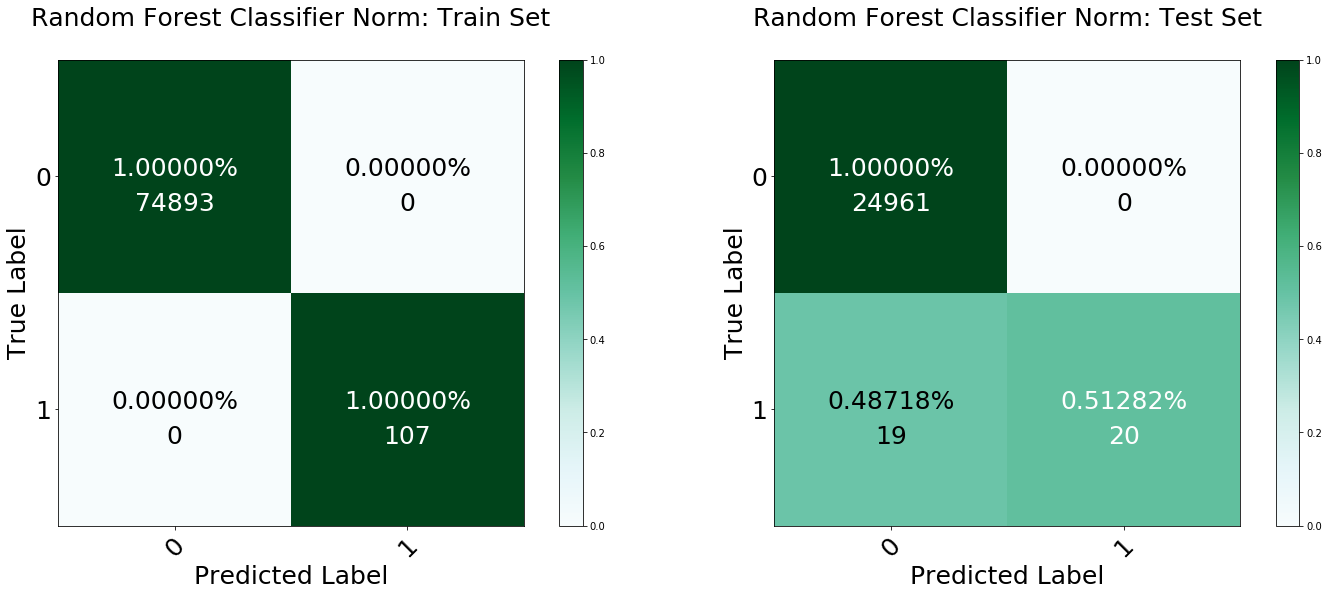

In [33]:
# Import and ranomd forset classifier on non PCA data
rf_model_norm = RandomForestClassifier(n_estimators=100, random_state=7)
rf_model_norm.name = "random_forest_classifier_norm"
rf_model_norm.fit(train_x_norm, train_y_norm, sample_weight = weights)

# Run crossvalidation using the model
cross_validate_normal(rf_model_norm, fit_params={'sample_weight':weights}, verbose=0,
                     train_y=train_y, train_x= train_x)

# Plot confusion matrix
plot_confusion_normal(rf_model_norm, train_x=train_x_norm, train_y=train_y_norm,
                     test_x = test_x_norm, test_y = test_y_norm, cmap=plt.cm.BuGn)

# Save model
joblib.dump(rf_model_norm, 'Model/'+rf_model_norm.name+'_'+working_file_name+'.sav');

<a id='xg'></a>
### XG Boost

XG Boost is basically an Random Forest model that support Boost Procedure after generating the ensemble of Random Forests. As this is normally the most dominent algorithim in the competive machine learning space. Lets attempt this model next. 

Done
Cross Validation ROC: 1.0
Cross Validation F1: 0.986713253611069
Cross Validation Precision: 0.9738357218427502
Cross Validation Recall: 1.0


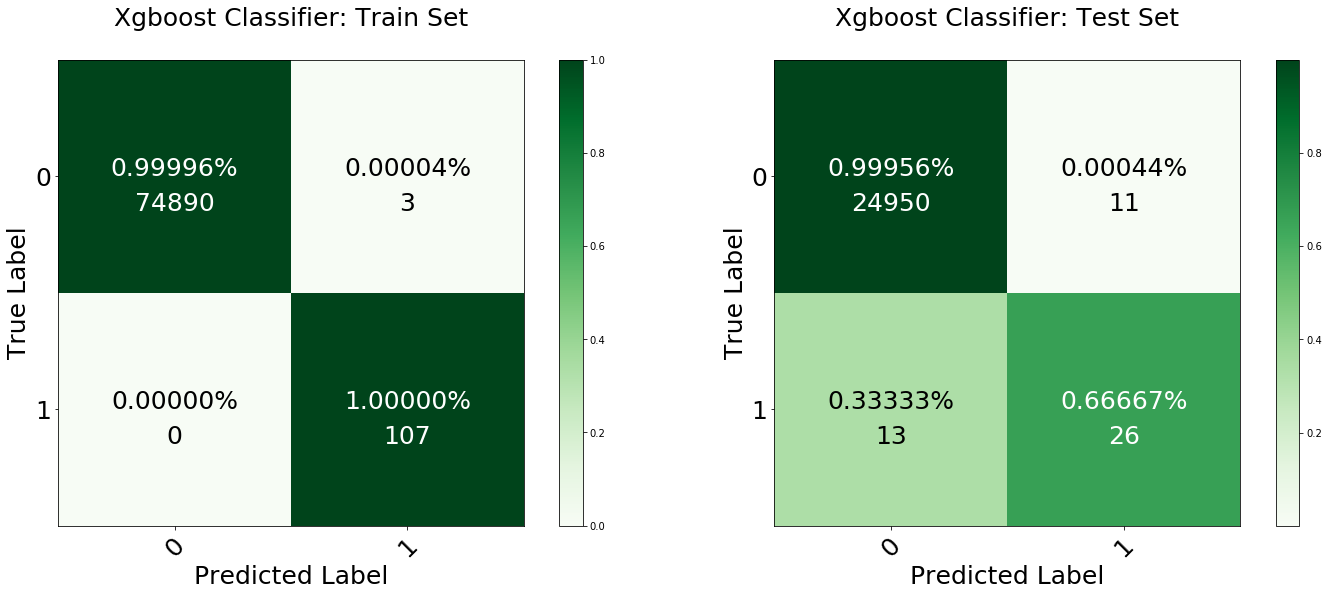

In [34]:
# Import and fit xgboost classifier
xg_model = XGBClassifier(max_depth=10, random_state=7)
xg_model.name = "xgboost_classifier"
xg_model.fit(train_x, train_y, sample_weight = weights)

# Run the crossvaldatino using the model
cross_validate_normal(xg_model, fit_params={'sample_weight':weights}, verbose=0,
                train_y=train_y, train_x= train_x)

# Plot confusion matrix
plot_confusion_normal(xg_model, train_x=train_x, train_y=train_y,
                     test_x=test_x ,test_y=test_y)

# Save model
joblib.dump(xg_model, 'Model/'+xg_model.name+'_'+working_file_name+'.sav');

It seem that that our roc_auc scoring metric has run into a rounding error. Let ignore the score now and just compare the number of FP and FN. 

Done
Cross Validation ROC: 1.0
Cross Validation F1: 0.986713253611069
Cross Validation Precision: 0.9738357218427502
Cross Validation Recall: 1.0


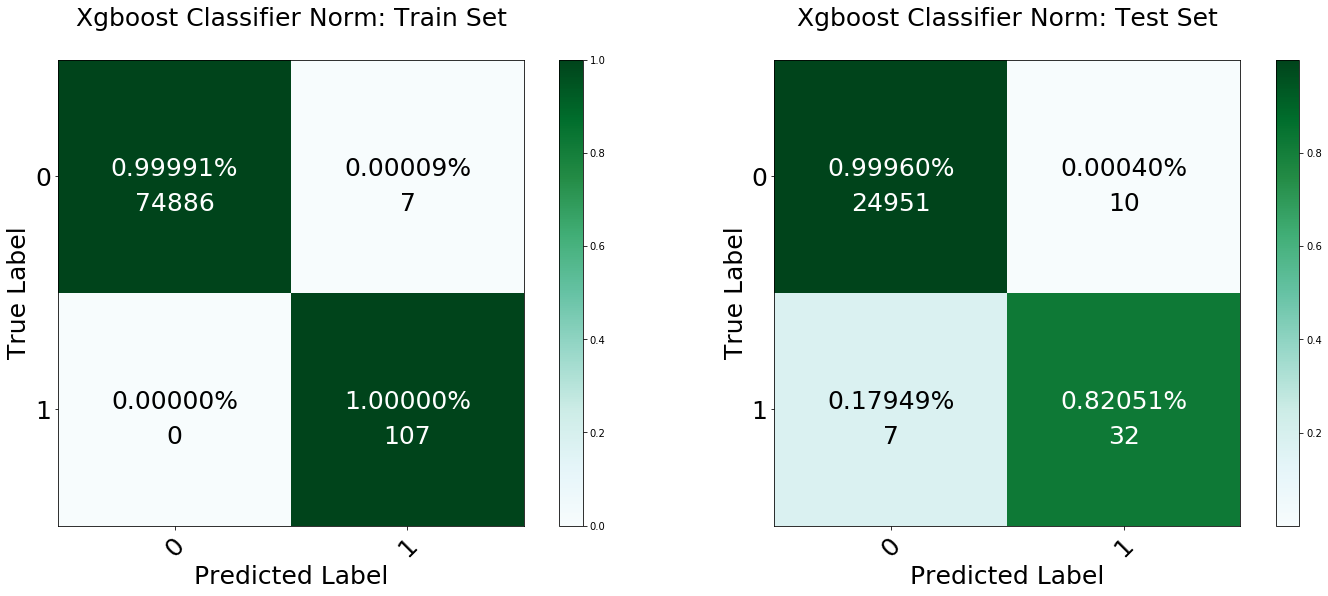

In [35]:
# Import and fit xgboost classifier on non PCA data
xg_model_norm = XGBClassifier(max_depth=10, random_state=7)
xg_model_norm.name = "xgboost_classifier_norm"
xg_model_norm.fit(train_x_norm, train_y_norm, sample_weight = weights)

# Run crossvalidation using the model
cross_validate_normal(xg_model_norm, fit_params={'sample_weight':weights}, verbose=0,
                     train_y=train_y, train_x= train_x)

# Plot confusion matrix
plot_confusion_normal(xg_model_norm, train_x=train_x_norm, train_y=train_y_norm,
                     test_x = test_x_norm, test_y = test_y_norm, 
                      cmap=plt.cm.BuGn)

# Save model
joblib.dump(xg_model_norm, 'Model/'+xg_model_norm.name+'_'+working_file_name+'.sav');

<br><br><br><br><br><br><br><br>
<a id='sl'></a>
## <center>Unsupervised Learning</center>


Often the time we don't have the appropriate labels to train our supervised models. In these situations, we have to turn to supervise models and anomaly detection algorithms to detect anomalies. While these methods are not better performing that the supervised data above. We are getting decent results without labeling any of our data.

<a id='dbscan'></a>
### Density Based Scan

After setting our default min samples and epsilon value we can use the DBSCAN clustering algorithm to scan our data and cluster the points in our data. A cool feature of the algorithm is that it is one of the view clustering algorithms that support noise. Meaning that points that do not fall into a cluster within this algorithm fall into a noise cluster. This noise cluster can be interpreted as our anomaly cluster. In summary, we are clustering the data into a group then labeling all the points that fall into our notice cluster as anomalies.


Train ROC: 0.48882405565273124
Train F1: 0.0
Train Precision: 0.0
Train Recall: 0.0


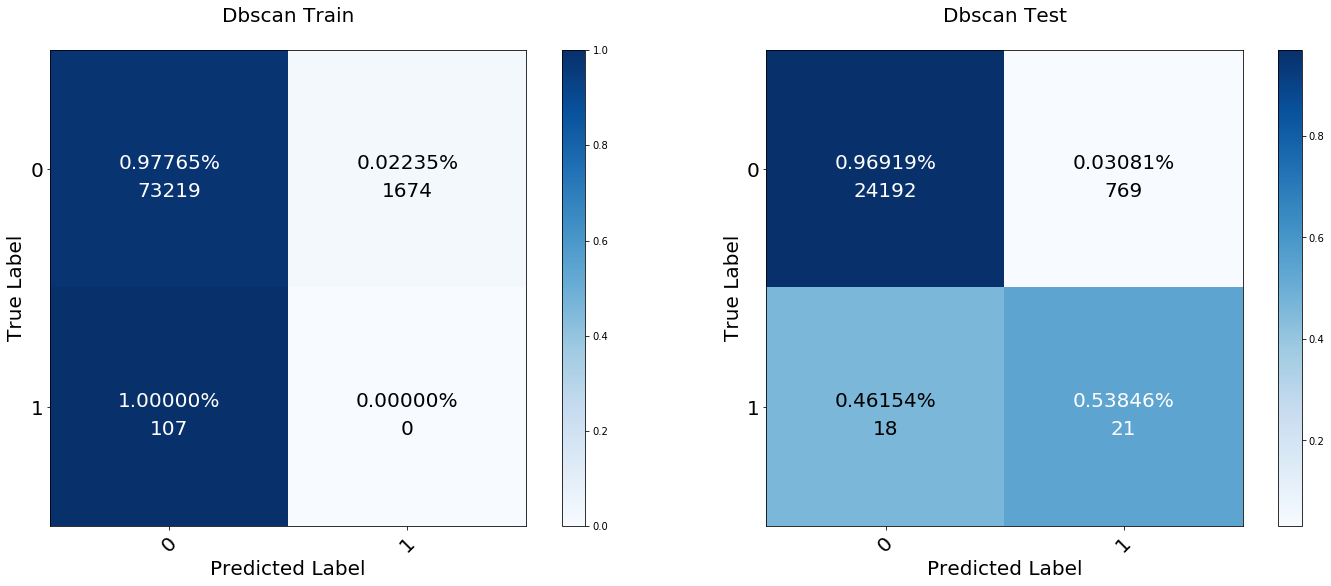

In [36]:
# Set the min number of samples. This value is the minimum number of points DBSCAN needs
# in it's radius of the length of the episolon to classify a point as a core point
min_samples = 5

# Set the episolon value which is the radius/distance measurement from one point to another
eps = 1

# Import dbscan model training
dbscan_train = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_train.name = 'dbscan_train'

# Import dbscan model training
dbscan_test = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_test.name = 'dbscan_test'

# Fit the models 
score_unsupervised(dbscan_train, dbscan_test, 'DBSCAN')
plot_confusion_unsuperived(dbscan_train, dbscan_test)

DB Scan is performing pretty poorly on the data. From my experience running this model on the dataset above the algorithm roc_auc scores stays around 45% to 65%, given the data set. This makes sense with our intuition as this datasets fraud label are closely associated with data that backed into the center area of the data (assumption), given the data we plotting the Descriptive Analytics Section. I believe further feature engineering on our time feature could help boost the score of this model by a couple of points.

<a id='meanshift'></a>
### Mean Shift

In simple the mean shift is a kernel density algorithm uses bandwidth parameter with is basically just a distance parameter to cluster data as if it were going up a hill. After defining your thresholds bandwidth the algorithm will cut cluster observation and label points that are not within the cluster given the bandwidth value. 

Train ROC: 0.5929844958870294
Train F1: 0.006792528218959144
Train Precision: 0.003432956381260097
Train Recall: 0.3177570093457944


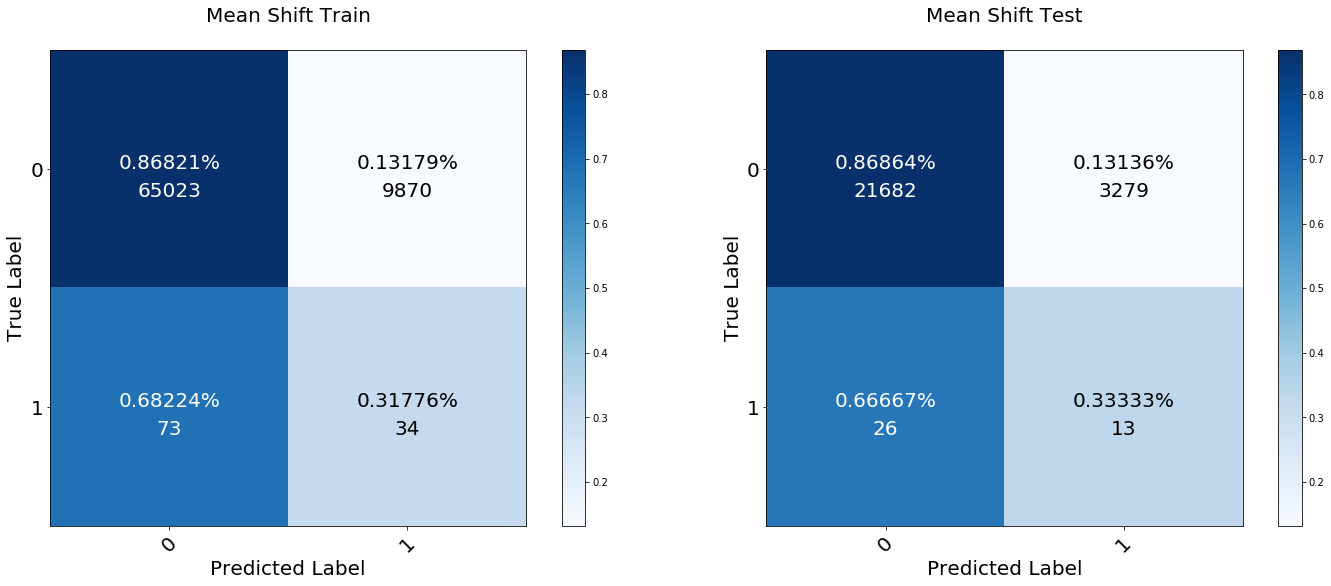

In [37]:
# Mean Shift Train Model
ms_train = MeanShift(bandwidth=3, cluster_all=False)
ms_train.name = 'mean_shift_train'

# Mean Shift Test Model
ms_test = MeanShift(bandwidth=3, cluster_all=False)
ms_test.name = 'mean_shift_test'

score_unsupervised(ms_train, ms_test, "Mean Shift")
plot_confusion_unsuperived(ms_train, ms_test)

You can see that our mean shift algorithm does a bit better than random on our data, and performed better than DBSCAN . Given that not y label was inputted into the model we can see that the algorithm has defined some cluster in the data given just the features.

<br><br><br><br><br><br><br><br>
## Threshold Models
Outside of the Supervised and Unsupervised algorithms. We can use. If the have thresholding information on the number of anomalies within our dataset. We can use that threshold parameter and apply a set of anomaly detection algorithms to located incoming anomalies within our training set. All the algorithms in this section use the contamination rate parameters of dataset as one of there variables, value defined below.

In [38]:
contamination_rate = (wdf['target'].value_counts()/wdf['target'].count())[1]
contamination_rate

0.001290820448180152

<a id='isolation'></a>
### Isolation Forest
The isolation forest algorithm a random forest of trees to detect data and anomalies. The algorithm generates an ensemble of decisions tree that trained on feature and are randomly split on a value between the max and min value of that feature. Deep in the tree, random splitting continues. The go of an individual tree is to isolate each value in the data into a node. Once the tree has been fitted we can notice that anomalies are normally segmented into their noted very early on in the splitting process. What the model measures are the number of splits it took to push the anomalies down to its end node. For anomalies, it is common for its value to be segmented early on. Since isolation forest conduct this random over an ensemble of trees its common that on average anomalies with have the shorter path from the center. Therefore isolation forest uses a contamination rate to label points within the shorter pats anomalies.

using the Isolation Forest algorithm, which is based on random forests and hence more adapted to large-dimensional settings, even if it performs quite well in the examples below.

In [1]:
if_model = IsolationForest(contamination=contamination_rate)
if_model.name = 'isolation_forest'
if_model.fit(train_x, sample_weight = weights)

cross_validate_anomoly(if_model, fit_params={'sample_weight':weights}, 
                 verbose=0, train_y=target_to_anon(train_y), train_x=train_x)

plot_confusion_anomoly(if_model, train_y, test_y)

joblib.dump(if_model, 'Model/'+if_model.name+'_'+working_file_name+'.sav');

NameError: name 'IsolationForest' is not defined

<a id='onescm'></a>
### One Class SVM
A one class support vector machine is basically similar to a modern SVM, the key difference here is that we only train the model using only the non anomaly class data. The support vector machine then builds a linear boundary around the data. When classifying new data, any data that lands outside this decision boundary is classified as an anomaly. This dataset type of model provides robustness for predicting future anomalies. As we can assume those future anomalies with ly outside our normal training data and will be caught outside our model's linear boundary.
One-Class SVM and its ability to capture the shape of the data set, hence performing better when the data is strongly non-Gaussian, i.e. with two well-separated clusters

##### Normal Training Set

In [40]:
# Isolating Calss 0 only Training 
train_y_both = pd.Series(train_y)
#print(train_y_both.value_counts())
normal_index = np.where(train_y_both==0)
train_x_normal = train_x[normal_index]
train_y_normal = train_y[normal_index]
train_x_normal;

0    74893
1      107
dtype: int64
Cross Validation ROC: 0.31452229561693884
Cross Validation F1: 0.9985745942913893
Cross Validation Precision: 0.998601262823448
Cross Validation Recall: 0.9985479277622729


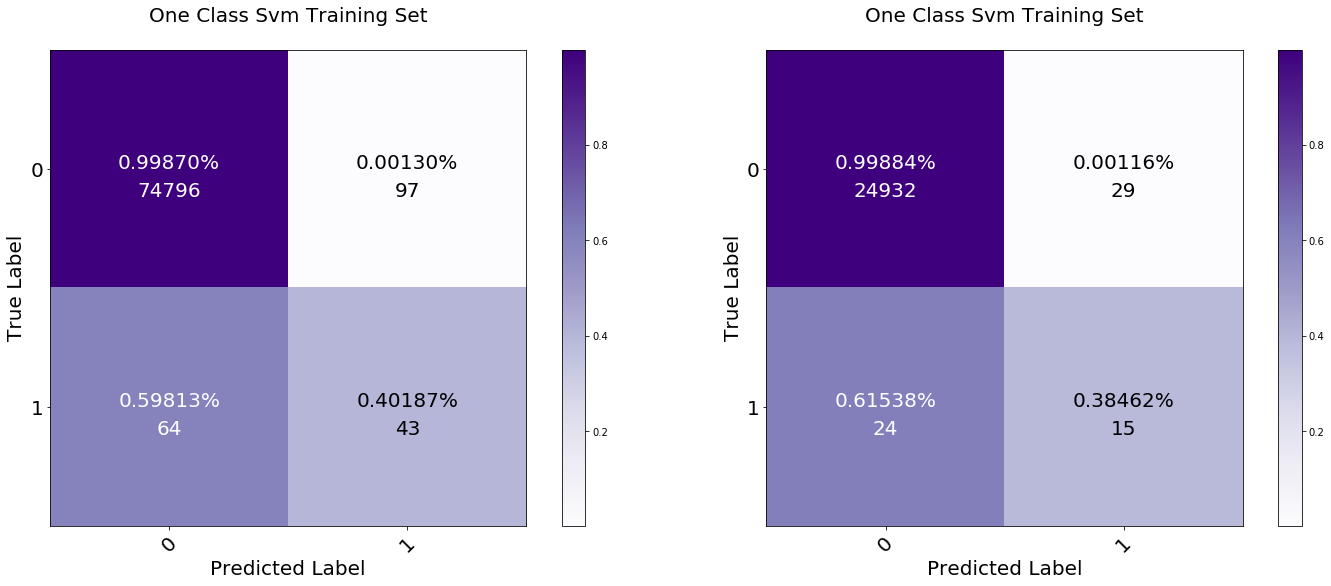

In [41]:
# Class 0 only Training 
train_y_both = pd.Series(train_y)
print(train_y_both.value_counts())
normal_index = np.where(train_y_both==0)
train_x_normal = train_x[normal_index]
train_y_normal = train_y[normal_index]
train_x_normal

# One Class  Support Vetor Machine
oc_model = OneClassSVM(nu = contamination_rate, gamma =0.0005)
oc_model.name = 'one_class_svm_training_set'
oc_model.fit(train_x_normal)

#Cross Validation, Plot, Save
cross_validate_anomoly(oc_model, cv = 5,  fit_params={'sample_weight':weights}, 
                 verbose=0, train_y=target_to_anon(train_y), 
                 train_x=train_x)
plot_confusion_anomoly(oc_model, train_y, test_y)
joblib.dump(oc_model, 'Model/'+oc_model.name+'_'+working_file_name+'.sav');

##### Full Training Set
When I was reaching this alogrithim. I was not 100% sure the it only tookin the training data or the normal class. Therefore I want to conduct some senstivity analysis. Below refit the model again but on the entire training set. As I contaminate the dataset I wanted to see what woould happen. 

In [42]:
pd.Series(target_to_anon(train_y)).value_counts()

 1    74893
-1      107
dtype: int64

Cross Validation ROC: 0.31452229561693884
Cross Validation F1: 0.9985745942913893
Cross Validation Precision: 0.998601262823448
Cross Validation Recall: 0.9985479277622729


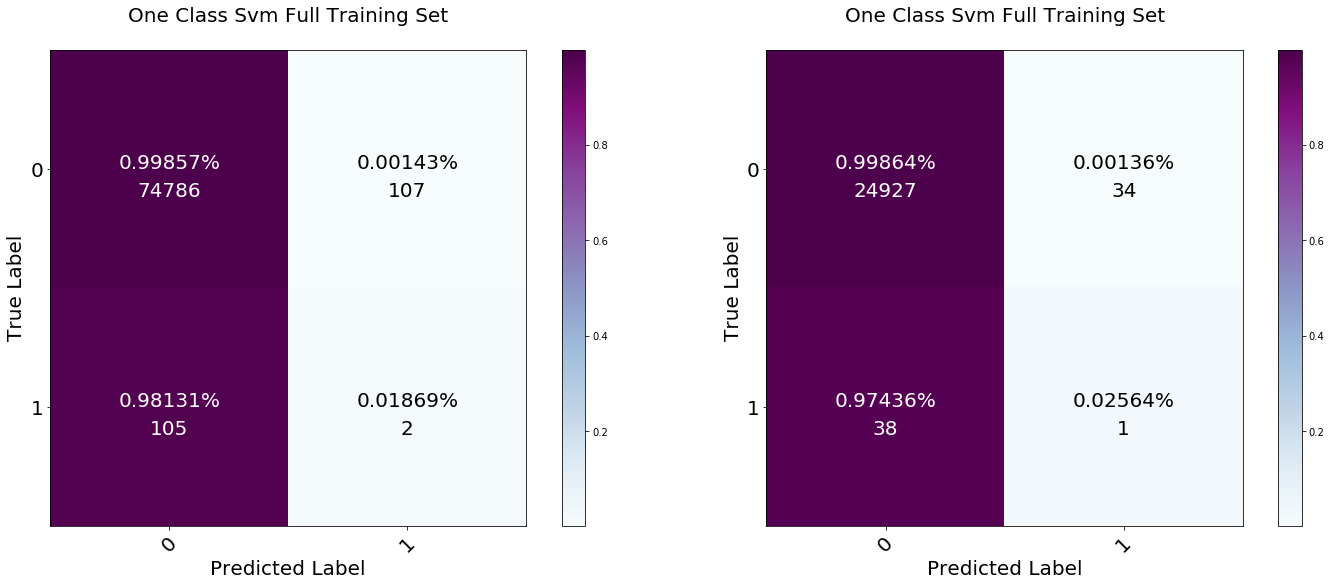

In [43]:
ocf_model = OneClassSVM(nu = contamination_rate, gamma =0.0005)
ocf_model.name = 'one_class_svm_full_training_set'
ocf_model.fit(train_x, sample_weight = weights)

cross_validate_anomoly(ocf_model, cv = 5,  fit_params={'sample_weight':weights}, 
                 verbose=0, train_y=target_to_anon(train_y),
                 train_x=train_x)

plot_confusion_anomoly(ocf_model, train_y, test_y, cmap=plt.cm.BuPu)
joblib.dump(ocf_model, 'Model/'+ocf_model.name+'_'+working_file_name+'.sav');

<a id='lof'></a>
### Local Outliers Factor

Local Outlier factor is another methodology that works under the assumption outliers are not just outliers relative to the global distribution but are outliers local to their neighbors. Local Outlier Factor calculates the density between every point in the training set and all of its neighbors. The algorithm then calculates the Local  Reachability Density for every point. Sort the Local  Reachability Density values, any points with a Local Reachability Density in the upper tail of the list are labeled as outliers depending on our contamination rate. This method would require batch uploading our data to the model as the model does not support `.predict` and `.predict_proba` methods in its Sklearn presentation.

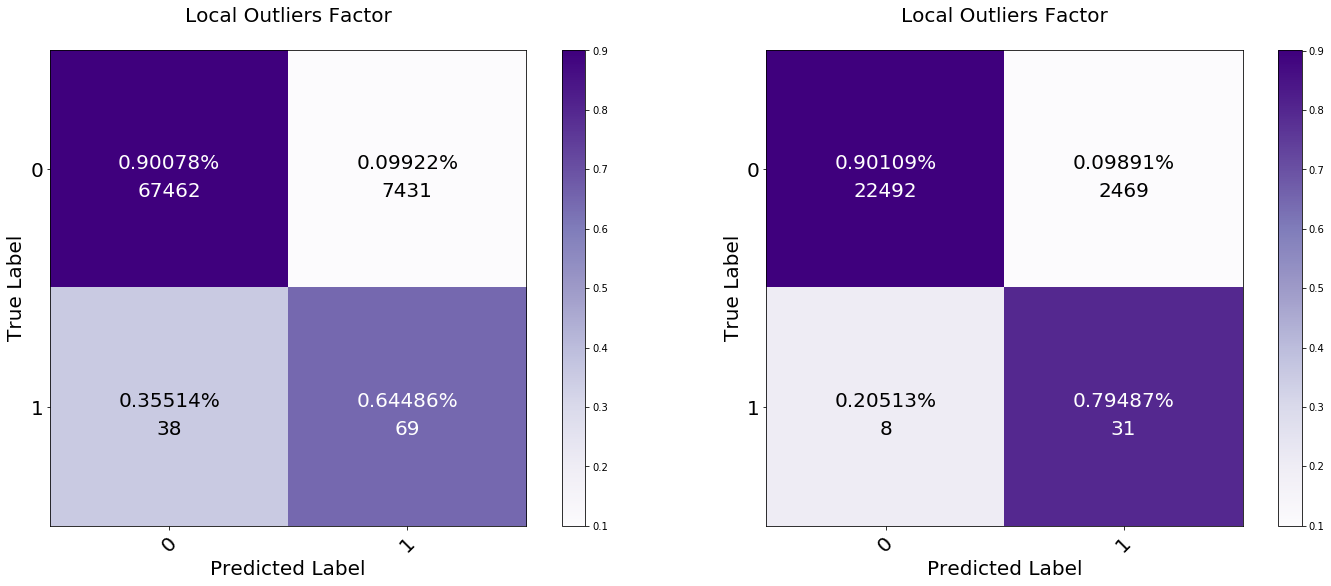

In [44]:
lof_model = LocalOutlierFactor()
lof_model.name = 'local_outliers_factor'
lof_model.fit(train_x) #Had to Remvoe weight , sample_weight = weights

# You cannot run cross validation on the model as the lof_model currently 
# has not predict or predict proba function
#cross_validate_anomoly(lof_model, 
#                  verbose=0, train_y = target_to_anon(train_y),
#                  train_x=train_x)


rcParams['figure.figsize'] = (30.0, 22.5)

# Plot Train Confusion Matrix
fig = gridspec.GridSpec(3,3)
grid_length = list(range(1,3))
tuple_grid = [(i,j) for i in grid_length for j in grid_length]

plt.subplot2grid((3,3), (0,0))
cm = confusion_matrix(train_y, anon_to_target(lof_model.fit_predict(train_x)))
plot_confusion_matrix(cm, classes, fontsize=20, 
                      title=lof_model.name,
                     normalize=True, cmap=plt.cm.Purples)

plt.subplot2grid((3,3), (0,1))
cm = confusion_matrix(test_y, anon_to_target(lof_model.fit_predict(test_x)))
plot_confusion_matrix(cm, classes, fontsize=20,
                      title=lof_model.name,
                     normalize=True, cmap=plt.cm.Purples);


# Save model
joblib.dump(lof_model, 'Model/'+lof_model.name+'_'+working_file_name+'.sav');

<a id='envolope'></a>
### Elliptic Envelope

Elliptic Envelope model goes about creating an ellipse around your data using and segment your outliers by placing an ellipsis boundary around your data. The algorithm assumes that your model is normally distributed as the model take bivariate samples of the dataset and uses multivariate Gaussian distribution to 


based on a robust estimator of covariance, which is assuming that the data are Gaussian distributed and performs better than the One-Class SVM in that case.


(unsupervised or supervised) it fits the tightest Gaussian (smallest volume ellipsoid) that it can while discarding some fixed fraction of contamination points set by the user.


A relatively simple model for the inlier-generating distribution is the multivariate Gaussian, which is parameterized by μ∈Rn
 and a covariance matrix Σ∈Rnxn
. This model can capture correlations between the data, so it can distort the Gaussian along any xi=x2
 line and take an ellipsoid shape generally. The class EllipticEnvelope takes your unlabeled X
 and fits such a multivariate Gaussian density to it.

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.1min finished


Cross Validation ROC: 0.7147231559675882
Cross Validation F1: 0.9986700357474213
Cross Validation Precision: 0.9986085563401176
Cross Validation Recall: 0.9987315232538801


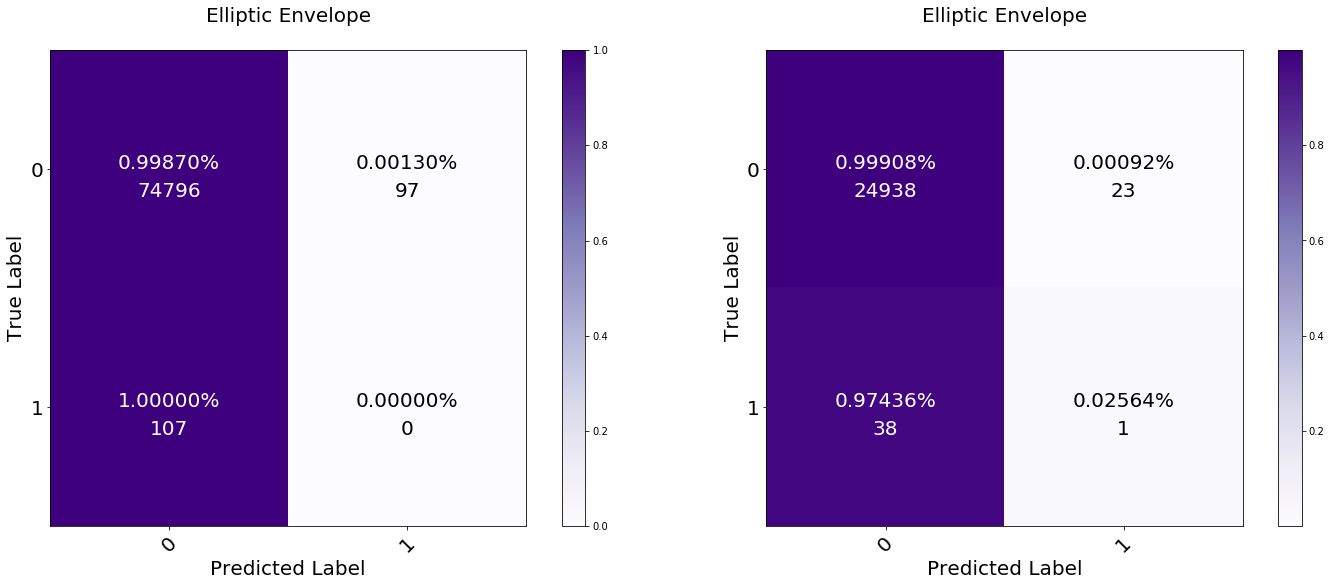

In [45]:
ee_model = EllipticEnvelope(contamination=contamination_rate)
ee_model.name = 'elliptic_envelope'
ee_model.fit(train_x)

cross_validate_anomoly(ee_model, train_y=target_to_anon(train_y),
                 train_x=train_x)

plot_confusion_anomoly(ee_model, train_y, test_y)

joblib.dump(ee_model, 'Model/'+ee_model.name+'_'+working_file_name+'.sav');

<br><br><br><br>
## <center>Ensembles</center>

The ensemble is often the technique that is used cutting-edge models to boost the previous of certain models. The technique aggregates the probabilities from each base models and selects the best model to predict each individual incoming data points with. Please note that your the following ensemble take a long time to run. I was not able to run both given my time constrain producing the 61 models in the bottom section
<a id='ensemble'></a>
### Voting Classifiers

In [ ]:
# Soft ensemble model
ensemble_rf_model = RandomForestClassifier(n_estimators=100, random_state=7)
ensemble_lr_model = LogisticRegression(penalty='l2', C=0.001)

ensemble = VotingClassifier(estimators=[('Random Forest Ensemble', ensemble_rf_model),
                                        ('Ensemble Logistic', ensemble_lr_model)],
                                        voting="soft",
                                        weights = [1,1], n_jobs=-1)


cross_validate_normal(ensemble, fit_params={'sample_weight':weights}, verbose=1,
                    train_y=train_y, train_x= train_x)
ensemble.name = 'ensemble_model'
ensemble.fit(train_x, train_y)
plot_confusion_normal(ensemble, train_x=train_x, train_y=train_y,
                     test_x = test_x, test_y = test_y, cmap=plt.cm.Oranges)
joblib.dump(ensemble, 'Model/ensemble_model_'+working_file_name+'.sav')

In [ ]:
# Hard ensemble model
ensemble_rf_model = RandomForestClassifier(n_estimators=100, random_state=7)
ensemble_lr_model = LogisticRegression(penalty='l2', C=0.001)

ensemble = VotingClassifier(estimators=[('Random Forest Ensemble', ensemble_rf_model),
                                        ('Ensemble Logistic', ensemble_lr_model)],
                                        voting="hard",
                                        weights = [1,1], n_jobs=-1)


cross_validate_normal(ensemble, fit_params={'sample_weight':weights}, verbose=1,
                    train_y=train_y, train_x= train_x)
ensemble.name = 'ensemble_model'
ensemble.fit(train_x, train_y)
plot_confusion_normal(ensemble, train_x=train_x, train_y=train_y,
                     test_x = test_x, test_y = test_y, cmap=plt.cm.Oranges)
joblib.dump(ensemble, 'Model/ensemble_model_'+working_file_name+'.sav')

<br><br><br><br><br>
<a id='sl'></a>
# <center>Neural Networks</center>

<a id='nn'></a>
### Densely Connected Network

This part of my capstone is very bootstrap. Neural Networks are the new hot thing at the moment. I have gone ahead and generated a Densely connected network below to see what kind of performance we can get from a pre-tuned network (Time to tune the network was not available at this time, I would do it if I had the time).

Below you will wind a densely connected 3 layered network, I use the real activation function and softmax function at the end during my training. I start off with 30 layers and work my way down to 1. As you can see that I have created a few custom metrics for the roc_auc, f1, precision and recall in my neural network. 

Instructions for updating:
Please switch to tf.metrics.auc. Note that the order of the labels and predictions arguments has been switched.
Epoch 1/5
75000/75000 [==============================] - 5s 65us/step - loss: 7.9712 - acc: 0.0014 - auc_roc: 0.5028 - precision: 0.0014 - recall: 0.0452 - f1: 0.0028      - ETA: 8s - loss: 7.9611 - acc: 0.0027 - auc_roc: 0.5311 - precision: 0.0027 - recall: 0.0861 - f1: 0.00 - ETA: 7s - loss: 7.9631 - ac
Epoch 2/5
75000/75000 [==============================] - 5s 60us/step - loss: 7.9712 - acc: 0.0014 - auc_roc: 0.5000 - precision: 0.0014 - recall: 0.0447 - f1: 0.0028: 3s - loss: 7.9733 - acc: 0.0012 - auc_
Epoch 3/5
75000/75000 [==============================] - 5s 62us/step - loss: 7.9712 - acc: 0.0014 - auc_roc: 0.5000 - precision: 0.0014 - recall: 0.0435 - f1: 0.0028
Epoch 4/5
75000/75000 [==============================] - 4s 60us/step - loss: 7.9712 - acc: 0.0014 - auc_roc: 0.5000 - precision: 0.0014 - recall: 0.0443 - f1: 0.0028
Epoch 5/5
750

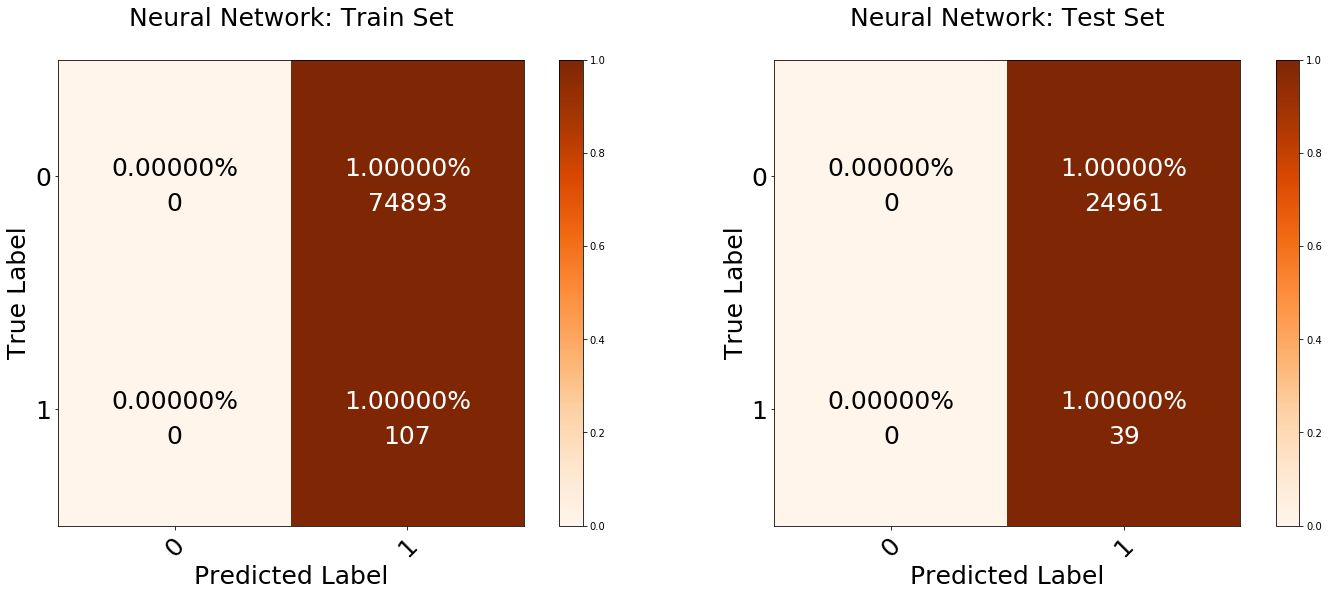

In [28]:
nn_model = models.Sequential()
nn_model.add(layers.Dense(30, activation='relu',input_shape=(train_x.shape[1],)))
nn_model.add(layers.Dense(16, activation='relu' ))
nn_model.add(layers.Dense(1, activation='softmax'))
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', auc_roc, precision, recall, f1])

nn_model.fit(train_x, train_y, epochs=5, sample_weight=weights)
nn_model.name  = 'neural_network'

cross_validate_neural(nn_model)
plot_confusion_normal(nn_model, train_x=train_x, train_y=train_y,
                     test_x = test_x, test_y = test_y, cmap=plt.cm.Oranges)
#joblib.dump(nn_model, 'Model/ensemble_model.sav')

You can see that our neural network did not perform so greate on our data. Given more time on with this reported I would have created a training generator in keras to resolve the class imbalance on this dataset to reweight the minority class during the training of the neural network. Time became an issues here.

<a id='autoencoder'></a>
### Auto Encoder

An autoencoder is a specialized neural network that instead of predicting with target values with the training features, it goes otherwise will instead be to attempt to recreate its training data with after passing the data through a bottleneck within the network. All the neurons before the network encode the data and all the neurons after the bottle decode the data that has reached the bottle neck. In the case of this example and we will train the auto encoder with all our training data and attempt to recreate the same using the neural network minus the outliers. When we have the data without we will compare the generated data with the training data and omit a reconstruction error for each observation in our training set. Once we have this information we can use a certain reconstruction error as a threshold to predict and isolate our anomalies. This model has been cited from this <a href='https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd'>source</a> as it is similar in structure.

In [29]:
# Set Intupd Dimenssion
input_dim = train_x.shape[1]
encoding_dim = 20

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

nb_epoch = 10
batch_size = 32

# Compile the network
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

# Save model after every epoch of Training
checkpointer = ModelCheckpoint(filepath="Model/autoencoder.h5",
                               verbose=0,
                               save_best_only=True)

# Save model logs to tensorboard
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

# Fit the model on the trainin data
history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=0,
                    callbacks=[checkpointer, tensorboard]).history

# Save model to local directory
autoencoder = load_model('Model/autoencoder.h5')


# Save predictions 
predictions = autoencoder.predict(train_x)
predictions = pd.DataFrame(predictions)

# Calculate mse
mse = np.mean(np.power(train_x - predictions, 2), axis=1)

# Aggregate the error dataframe
error_df = pd.DataFrame({'reconstruction_error': mse,
         'true_class': train_y})

# View error dataframe
error_df.head()

,reconstruction_error,true_class
0,0.173,0
1,0.309,0
2,0.262,0
3,0.242,0
4,0.106,0


### Plot Area Under the Curve

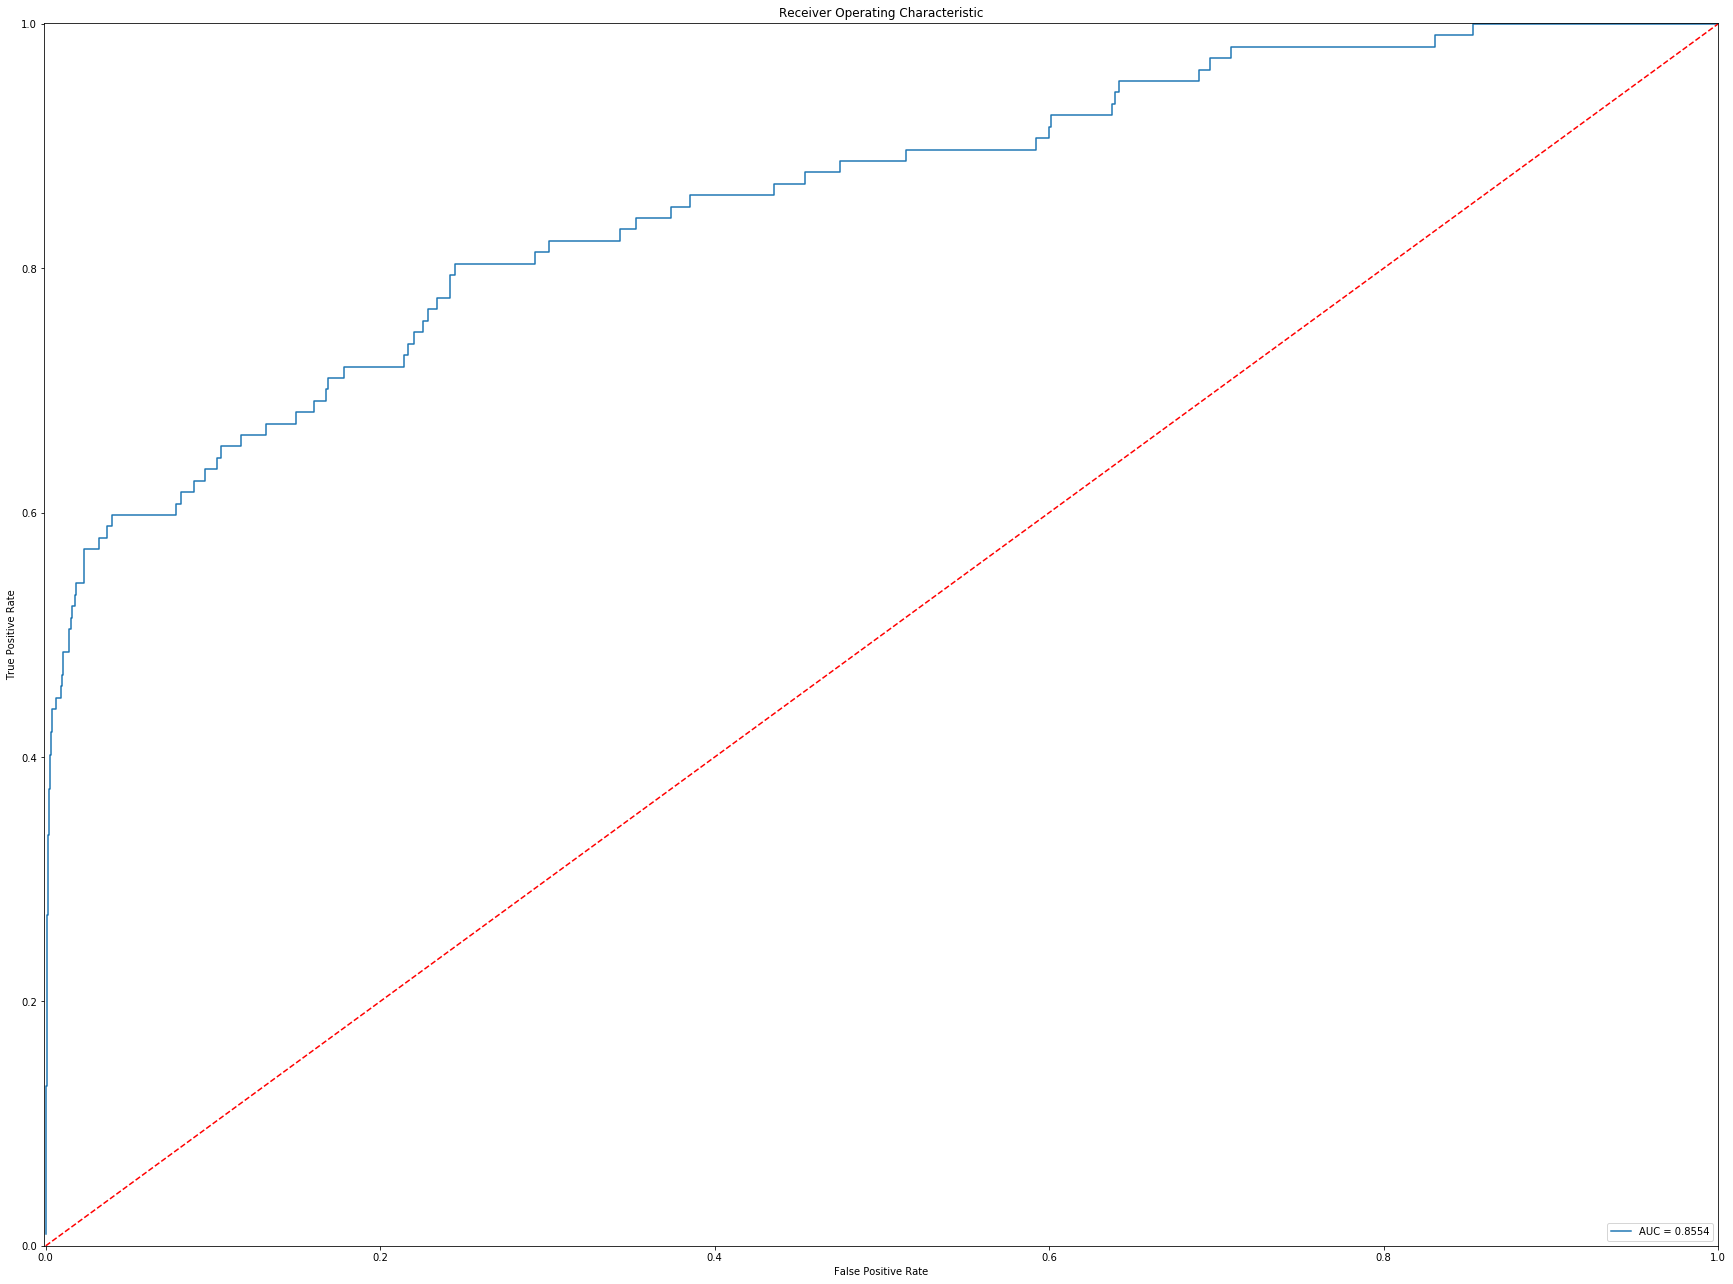

<Figure size 2160x1620 with 0 Axes>

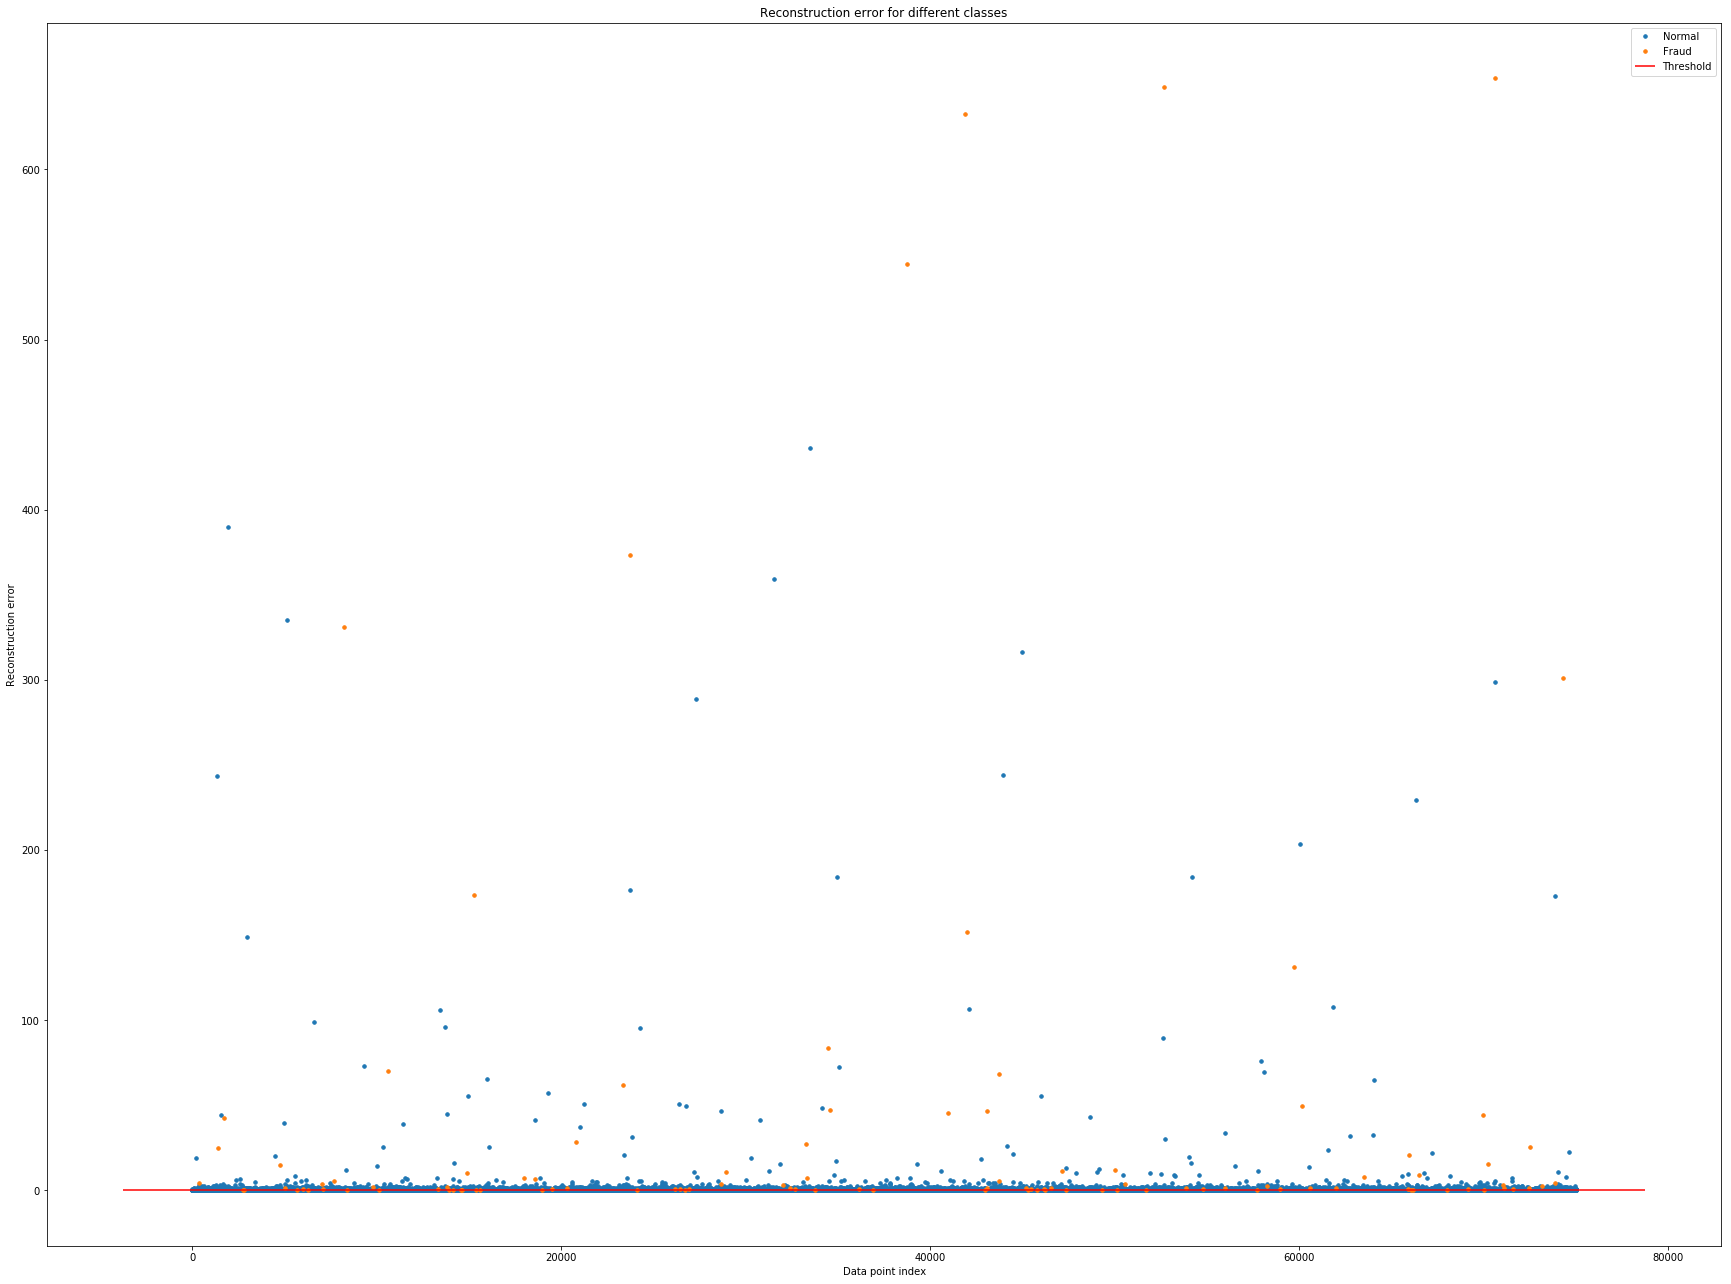

In [30]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

# Plot Roc Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

# Plot Threshold 
plt.figure()
threshold = 0.25
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


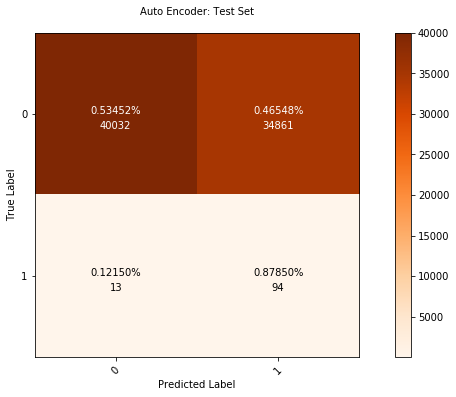

In [31]:
rcParams['figure.figsize'] = (30.0, 15.0)
# Plot Train Confusion Matrix
fig = gridspec.GridSpec(3,3)
grid_length = list(range(1,3))
tuple_grid = [(i,j) for i in grid_length for j in grid_length]

# Plot Confusion Test Confusino Matrix
plt.subplot2grid((3,3), (0,1))
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
cm = confusion_matrix(error_df.true_class, y_pred)


plot_confusion_matrix(cm, classes, fontsize=10, cmap=plt.cm.Oranges, 
                      title='Auto Encoder: Test Set');

Since this autoencoder has not been tuned it is not performing so well. The fact that our at is be intertwined with the normal data make it difficult to use thresholding autoencoder to classify the outliers. This makes sense when we think about our threshold model performance shown above. But the use case if very interested. I would like to play around with layers, sampling reweighting, threshold, and create a cross-validation function to optimize the model in the future.

<br><br><br><br>
## <center>Metrics</center>




<a id='metrics_agg'></a>
### Aggregating Metrics
The first thing we are going to do is aggregate our historical metrics with our current metrics for the models above. I did this at the beginning of my capstone so I could compare the parameters of the model above (that have been tuned models) with previous combinations. I often change the name of the model specific models to test their sensitivity. 

In [32]:
# Concatenate all scoring lists into a dataframe
metrics = pd.DataFrame([dataset_name_list,model_name_list,cv_fold_list,mean_train_roc_auc,mean_test_roc_auc,
                mean_train_f1,mean_test_f1, mean_train_precision,
                mean_test_precision,mean_train_recall,mean_test_recall,
                mean_fit_time,mean_score_time,std_train_roc_auc,std_test_roc_auc,
                std_train_f1,std_test_f1,std_train_precision,std_test_precision,
                std_train_recall,std_test_recall,std_fit_time,std_score_time,
                training_X_size, testing_X_size,training_y_size,testing_y_size]).T

# Set metric columns names
metrics.columns = ['dataset_name_list','model_name_list','cv_fold_list','mean_train_roc_auc','mean_test_roc_auc',
                'mean_train_f1','mean_test_f1', 'mean_train_precision',
                'mean_test_precision','mean_train_recall','mean_test_recall',
                'mean_fit_time','mean_score_time','std_train_roc_auc','std_test_roc_auc',
                'std_train_f1','std_test_f1','std_train_precision','std_test_precision',
                'std_train_recall','std_test_recall','std_fit_time','std_score_time',
                'training_X_size', 'testing_X_size','training_y_size','testing_y_size']

# Import old metrics file from last day of testing if it exist
try:
    old_metrics = pd.read_csv('Scores/metric-'+working_file_name.lower()+'.csv')
    metrics = pd.concat([metrics, old_metrics], axis=0).reset_index(drop=True)
except:
    print('Scores/metric-'+working_file_name+'.csv File Not Found')

# Round scores to 6 decimals points
metrics = metrics.round(6)

# Drop duplicate model scores (All columns)
metrics.drop_duplicates(keep='first', inplace=True)

# Drop duplicate model scores (Subset of columns)
metrics.drop_duplicates(subset=['model_name_list', 'mean_test_roc_auc', 'mean_train_roc_auc',
       'mean_test_f1', 'mean_train_f1', 'mean_test_precision',
       'mean_train_precision', 'mean_test_recall', 'mean_train_recall'], inplace=True)

# Sort by test and train roc_auc
metrics = metrics.sort_values(by=['mean_test_roc_auc','mean_train_roc_auc'], ascending=False)

# Reset index
metrics = metrics.reset_index(drop=True);

Scores/metric-synthetics.csv File Not Found


<br><br>
<a id='metrics_export'></a>
### Export Metric Data

In [34]:
# Exporting model scores so we don't need to run the models again
metrics.to_csv('Scores/metric-'+working_file_name.lower()+'.csv', index=False)

<br><br>
<a id='metrics_import'></a>
### Import Metric Data

In [37]:
# Import metric data
#ccdf_metric = pd.read_csv('Scores/metric-credit_card.csv')
sdf_metric = pd.read_csv('Scores/metric-synthetics.csv')

<br><br>
<a id='metrics_view'></a>
### View the Data

Great, let's view our model's scores now. Each dataset has been trained on most types of models. The autoencoder and mean-shift models have not been trained on every dataset but only the synthetic data since I was running out of time. Secondly, grid search has only been completed on specific models and dataset conditions for the sake of time. The current version of this notebook has currently generated 61 models on my local machine. As you can see time was an issue given the times I had to conduct the grid searches.

In [38]:
# View top 5 model for the kaggle credit card data set
ccdf_metric.sort_values('mean_test_roc_auc',ascending=False).head(n=5)

NameError: name 'ccdf_metric' is not defined

In [ ]:
# View top 5 model for the synthetic credit card data set
sdf_metric.sort_values('mean_test_roc_auc',ascending=False).head(n=5)

In [ ]:
# View the top 5 models for the kdd networ attack dataset
kdddf_metric.sort_values('mean_test_roc_auc',ascending=False).head(n=5)

In [ ]:
# Plot the best models for our synthetic dataset
rcParams['figure.figsize'] = (20.0, 10.0)
sns.barplot(x='mean_train_roc_auc', y='model_name_list',data=sdf_metric, color ='#a1dab4',errwidth=0)
sns.barplot(x='mean_test_roc_auc', y='model_name_list',data=sdf_metric, color='#969696',errwidth=0);
plt.title('Model Score Comparison: Train vs Test ROC_AUC Score');

### Conslusion
As you can see from the model leaderboards above, which have been sorted by the mean_test_auc_roc scores from our customer cross-validation function. Ensembling tree method dominates the 5 top leaderboards. After looking at these results we can conclude that for our datasets similar to these 3, a tree-based method would be the best way to approach the problem. Most Fraud/Network attack dataset contains a high amount of dimensionality, and tree-based method normally excels datasets with high dimensionality. The intended nature of the fraudulent outliers in the data also makes it difficult for threshold models to perform accurately on the data. We see these results in scores of base autoencoder and thresholding models.

<br><br><br><br>
## <center> Bonus</center>

<br><br>
<a id='run'></a>
### Load and Run in Terminal
Use the following command to run flask restful in terminal: `python modelapp.py`. Then use this next command to import your data into our model.

In [ ]:
# Import Prelimnaries
import numpy as np
import time
from sklearn.externals import joblib

# Import Data
kdddf = pd.read_csv('Data/KDD/kddcup.data')
kdddf = kdddf.rename(columns={'normal.':'target'})

# Import Model
loaded_model = joblib.load('Model/logistic_regression_kdd.sav')

# Preprocess Data
kdddf.target = [0 if i == 'normal.' else 1 for i in kdddf.target]
for col in kdddf.select_dtypes('object'):
    kdddf[col] = kdddf[col].astype('category').cat.codes
kdddf.head()

# Encode Data to Numpy
y = kdddf.target.values
X = kdddf.drop('target',axis=1).values

# Start Constant Predictor
counter = 0
total = 0
while True:
    time.sleep(5)
    n = np.random.randint(0,100000)
    val = X[n]
    val_y = y[n]
    val = val.reshape(1, -1)
    val = pca.transform(val)
    val = scaler.transform(val)
    result = loaded_model.predict(val.reshape(1, -1))
    result = result[0]
    total += 1
    if result == val_y:  
        counter +=1 
        print("Prediction:", result, 
              'True:',val_y,
              'Correct Predictions:',counter,
              'Total:',total)
    

<br><br>
<a id='conda'></a>
### Conda Enviroment
Please use the conda file provided in the link below and the conda command to install my deveploment enviroment via conda if you want to run the following code provided in this notebook. Best of luck.

Link: https://drive.google.com/file/d/1pg36ACe7Jg8tvMmFjDPFgUUHFAPCPi69/view?usp=sharing

Conda Command: `conda env create --file keras-env.txt`

<br><br>
### Source

**Data Sources**

- http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
- https://www.kaggle.com/ntnu-testimon/paysim1
- https://www.kaggle.com/mlg-ulb/creditcardfraud


**Articles**

- https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd
- https://stackoverflow.com/questions/42891148/changing-colors-for-decision-tree-plot-created-using-export-graphviz
- https://www.youtube.com/watch?v=5cOhL4B5waU
- https://www.youtube.com/watch?v=AgPQ76RIi6A
- https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/
- https://www.google.ca/url?sa=i&source=images&cd=&ved=2ahUKEwjiw7r31_zcAhWC5IMKHQqnCPcQ5TV6BAgBEAs&url=https%3A%2F%2Fwww.predix.io%2Fapi%2Fcatalog%2Fanalytics%2Fartifacts%2F53ab5bc9-3c7a-4b64-ace2-14d5bb898a78%2Ffile%3FfileName%3DIsolationForestOutlier%2520Documentation.pdf&psig=AOvVaw0roeRvzxnNy4h-K2hBg3QI&ust=1534890796436651
- https://plot.ly/scikit-learn/plot-outlier-detection/
- https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
